In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')
from src.plotting_functions import plot_correlation_coefficients, plot_histogram, multiple_scatter_plots


In [2]:
#import data
df_state = pd.read_csv('data/EJSCREEN_2019_StatePctiles.csv')

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,8,9,11,36,38,39,41,42,44,69,71) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220333 entries, 0 to 220332
Columns: 128 entries, OBJECTID to Shape_Area
dtypes: float64(38), int64(34), object(56)
memory usage: 215.2+ MB


In [4]:
#view all columns
cols = df_state.columns.tolist()
pd.options.display.max_columns = None

In [5]:
#cast 'ID' column to string in order to index
df_state['ID'] = df_state['ID'].astype(str)


In [6]:
#create new columns for census tract, county, state
df_state['census tract'] = df_state['ID'].str[:-1:1]
df_state['county'] = df_state['ID'].str[:-7:1]
df_state['state'] = df_state['ID'].str[:-10:1]


In [7]:
#select columns of interest
df_filtered = df_state[[ 'ID',
                         'state',
                         'county',
                         'census tract',
                         'STATE_NAME',
                         'ACSTOTPOP',
                         'MINORPCT',
                         'LOWINCPCT',
                         'PM25',
                         'OZONE',
                         'DSLPM',
                         'CANCER',
                         'RESP',
                         'PRE1960PCT',
                         'PNPL',
                         'PRMP',
                         'PTSDF',
                         'PWDIS',
                         'PTRAF'

                         ]]

In [8]:
#rename columns
df = df_filtered.rename(columns={"ACSTOTPOP": "Total Population", 
                   "PM25": "PM25 (ug/m3)",  #PM2.5 levels in air micrograms/m^3
                   'OZONE': 'OZONE (ppb)', #Ozone avg concetration in air in parts per billion
                   'DSLPM': 'DSLPM (ug/m3)', #Diesel particulat matter level in air micograms/m^3
                   'CANCER': 'CANCER (lifetime risk per million)', #lifetime cancer risk from inhalation of air toxics
                   'RESP': 'RESP (hazard index)',#ratio of exposure concentration to health-based reference concentration
                   'PTRAF': 'PTRAF (daily vehicles/meters distance)', #traffic proximity/volume. count of vehicles at major roads within 500 meters, divided by distance in m
                   'PRE1960PCT': 'LDPNT (fraction pre-1960)', #percent of housing units build pre-1960
                   'PNPL': 'PNPL (facilities/km distance)', #proximity to national priorities list (NPL)sites
                   'PRMP': 'PRMP (facilities/km distance)', #proximity to risk management plan (RMP) sites (potential chemical accident management plan)
                   'PTSDF': 'PTSDF (facilities/km distance)', #Proximity to Hazardous waste facilities 
                   'PWDIS': 'PWDIS (toxicity-weighted concentration/meters distance)', #wastewater discharge indicator (stream proximity and toxic concentration )                  
                   'MINORPCT': 'Percent Minority',
                   'LOWINCPCT': 'Percent Low Income',
                  })

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220333 entries, 0 to 220332
Data columns (total 19 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   ID                                                       220333 non-null  object 
 1   state                                                    220333 non-null  object 
 2   county                                                   220333 non-null  object 
 3   census tract                                             220333 non-null  object 
 4   STATE_NAME                                               220333 non-null  object 
 5   Total Population                                         220333 non-null  int64  
 6   Percent Minority                                         220333 non-null  float64
 7   Percent Low Income                                       220333 non-null  float64
 8   PM25 (ug/m3)  

In [10]:
#replace none values
df.replace(to_replace=['None'], value=np.nan, inplace=True)

#get rid of nan values 
df = df.dropna()

#get rid of rows with population 0 (no people living here)
df = df[df['Total Population'] != 0]

#change object datatypes to numeric
df['OZONE (ppb)'] = pd.to_numeric(df['OZONE (ppb)'])
df['PM25 (ug/m3)'] = pd.to_numeric(df['PM25 (ug/m3)'])
df['DSLPM (ug/m3)'] = pd.to_numeric(df['DSLPM (ug/m3)'])
df['CANCER (lifetime risk per million)'] = pd.to_numeric(df['CANCER (lifetime risk per million)'])
df['RESP (hazard index)'] = pd.to_numeric(df['RESP (hazard index)'])
df['PWDIS (toxicity-weighted concentration/meters distance)'] = pd.to_numeric(df['PWDIS (toxicity-weighted concentration/meters distance)'])




In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215255 entries, 0 to 217738
Data columns (total 19 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   ID                                                       215255 non-null  object 
 1   state                                                    215255 non-null  object 
 2   county                                                   215255 non-null  object 
 3   census tract                                             215255 non-null  object 
 4   STATE_NAME                                               215255 non-null  object 
 5   Total Population                                         215255 non-null  int64  
 6   Percent Minority                                         215255 non-null  float64
 7   Percent Low Income                                       215255 non-null  float64
 8   PM25 (ug/m3)  

In [12]:
#summary statistics
df.describe()

Total Population  Percent Minority  Percent Low Income   PM25 (ug/m3)  \
count     215255.000000     215255.000000       215255.000000  215255.000000   
mean        1480.763072          0.365868            0.343666       8.237331   
std          957.765491          0.313382            0.212953       1.532026   
min            2.000000          0.000000            0.000000       3.039935   
25%          897.000000          0.095077            0.171986       7.340165   
50%         1269.000000          0.266355            0.312883       8.317710   
75%         1812.000000          0.600000            0.487869       9.115823   
max        51872.000000          1.000000            1.000000      14.866984   

         OZONE (ppb)  DSLPM (ug/m3)  CANCER (lifetime risk per million)  \
count  215255.000000  215255.000000                       215255.000000   
mean       42.938183       0.484074                           31.519674   
std         6.340000       0.390611                           11.968340   
min        25.273253       0.010643                            8.772592   
25%        39.295921       0.221968                           25.089687   
50%        43.702078       0.389856                           30.763387   
75%        46.060744       0.624394                           36.906299   
max        72.841420       6.076340                         1505.116697   

       RESP (hazard index)  LDPNT (fraction pre-1960)  \
count        215255.000000              215255.000000   
mean              0.433491                   0.347599   
std               0.147488                   0.293481   
min               0.090885                   0.000000   
25%               0.324985                   0.078788   
50%               0.420329                   0.278658   
75%               0.523504                   0.584530   
max               4.060576                   1.000000   

       PNPL (facilities/km distance)  PRMP (facilities/km distance)  \
count                  215255.000000                  215255.000000   
mean                        0.137758                       0.783079   
std                         0.287356                       1.108542   
min                         0.000000                       0.000000   
25%                         0.026572                       0.139224   
50%                         0.061225                       0.327303   
75%                         0.133480                       1.005884   
max                         8.987891                      18.436711   

       PTSDF (facilities/km distance)  \
count                   215255.000000   
mean                         4.217055   
std                         20.914332   
min                          0.000000   
25%                          0.130211   
50%                          0.499850   
75%                          1.934038   
max                        425.382142   

       PWDIS (toxicity-weighted concentration/meters distance)  \
count                                       2.152550e+05         
mean                                        2.779386e+01         
std                                         7.729771e+03         
min                                         0.000000e+00         
25%                                         0.000000e+00         
50%                                         4.138833e-05         
75%                                         4.825950e-03         
max                                         3.576087e+06         

       PTRAF (daily vehicles/meters distance)  
count                           215255.000000  
mean                               790.621300  
std                               1746.607088  
min                                  0.000000  
25%                                 46.531759  
50%                                229.295885  
75%                                740.336004  
max                              37575.510360

In [13]:
df['Total Toxic Facilities (facilities/km distance)'] = (df['PNPL (facilities/km distance)'] + df['PRMP (facilities/km distance)'] + df['PTSDF (facilities/km distance)'])

In [14]:
df_ca = df[df['STATE_NAME'] == 'California']

In [15]:
df_ca.describe()

Total Population  Percent Minority  Percent Low Income  PM25 (ug/m3)  \
count      23136.000000      23136.000000        23136.000000  23136.000000   
mean        1684.729383          0.589668            0.334405      9.710319   
std         1064.379674          0.280657            0.218334      2.148726   
min            3.000000          0.000000            0.000000      4.521780   
25%         1036.000000          0.349146            0.152326      8.000439   
50%         1472.000000          0.601100            0.295202      9.419585   
75%         2074.250000          0.852376            0.489073     11.664544   
max        40402.000000          1.000000            1.000000     14.866984   

        OZONE (ppb)  DSLPM (ug/m3)  CANCER (lifetime risk per million)  \
count  23136.000000   23136.000000                        23136.000000   
mean      47.442149       0.477200                           35.466904   
std       11.072453       0.304362                            7.437864   
min       26.391880       0.011534                           11.977185   
25%       40.355875       0.263893                           29.480438   
50%       47.354757       0.422084                           36.170867   
75%       55.079886       0.652481                           40.910163   
max       72.841420       4.330458                           94.975217   

       RESP (hazard index)  LDPNT (fraction pre-1960)  \
count         23136.000000               23136.000000   
mean              0.548058                   0.344079   
std               0.137539                   0.292500   
min               0.157208                   0.000000   
25%               0.448172                   0.064098   
50%               0.546597                   0.287242   
75%               0.632124                   0.589638   
max               2.799226                   1.000000   

       PNPL (facilities/km distance)  PRMP (facilities/km distance)  \
count                   23136.000000                   23136.000000   
mean                        0.180098                       1.112554   
std                         0.443119                       1.517493   
min                         0.000000                       0.000000   
25%                         0.043749                       0.204714   
50%                         0.085625                       0.570894   
75%                         0.161555                       1.391691   
max                         8.777274                      18.436711   

       PTSDF (facilities/km distance)  \
count                    23136.000000   
mean                         3.481240   
std                          4.099497   
min                          0.000000   
25%                          0.437833   
50%                          2.050917   
75%                          4.929926   
max                         46.418120   

       PWDIS (toxicity-weighted concentration/meters distance)  \
count                                       2.313600e+04         
mean                                        1.586118e+02         
std                                         2.351069e+04         
min                                         0.000000e+00         
25%                                         0.000000e+00         
50%                                         0.000000e+00         
75%                                         5.149126e-03         
max                                         3.576087e+06         

       PTRAF (daily vehicles/meters distance)  \
count                            23136.000000   
mean                              2134.157141   
std                               3133.747410   
min                                  0.000000   
25%                                327.315578   
50%                               1063.215773   
75%                               2533.573233   
max                              37575.510360   

       Total Toxic Facilities (facilities/km distance)  
count     

In [16]:
df_alameda = df[df['county'] == '6001']

In [17]:
#plot scatter matrix to understand any correlations between data categories
scatter_cols = [ 
                'Percent Minority',
                'Percent Low Income',
                'PM25 (ug/m3)', 
                'OZONE (ppb)', 
                'DSLPM (ug/m3)', 
                'CANCER (lifetime risk per million)',
                'RESP (hazard index)',
                'LDPNT (fraction pre-1960)',
                'PNPL (facilities/km distance)',
                'PRMP (facilities/km distance)',
                'PTSDF (facilities/km distance)',
                'PWDIS (toxicity-weighted concentration/meters distance)',
                'Total Toxic Facilities (facilities/km distance)'
                ]


#columns of interest for hypothesis testing:
scatter_cols_testing = [ 
                'Percent Minority',
                'PM25 (ug/m3)', 
                'OZONE (ppb)', 
                'CANCER (lifetime risk per million)',
                'RESP (hazard index)'
                ]


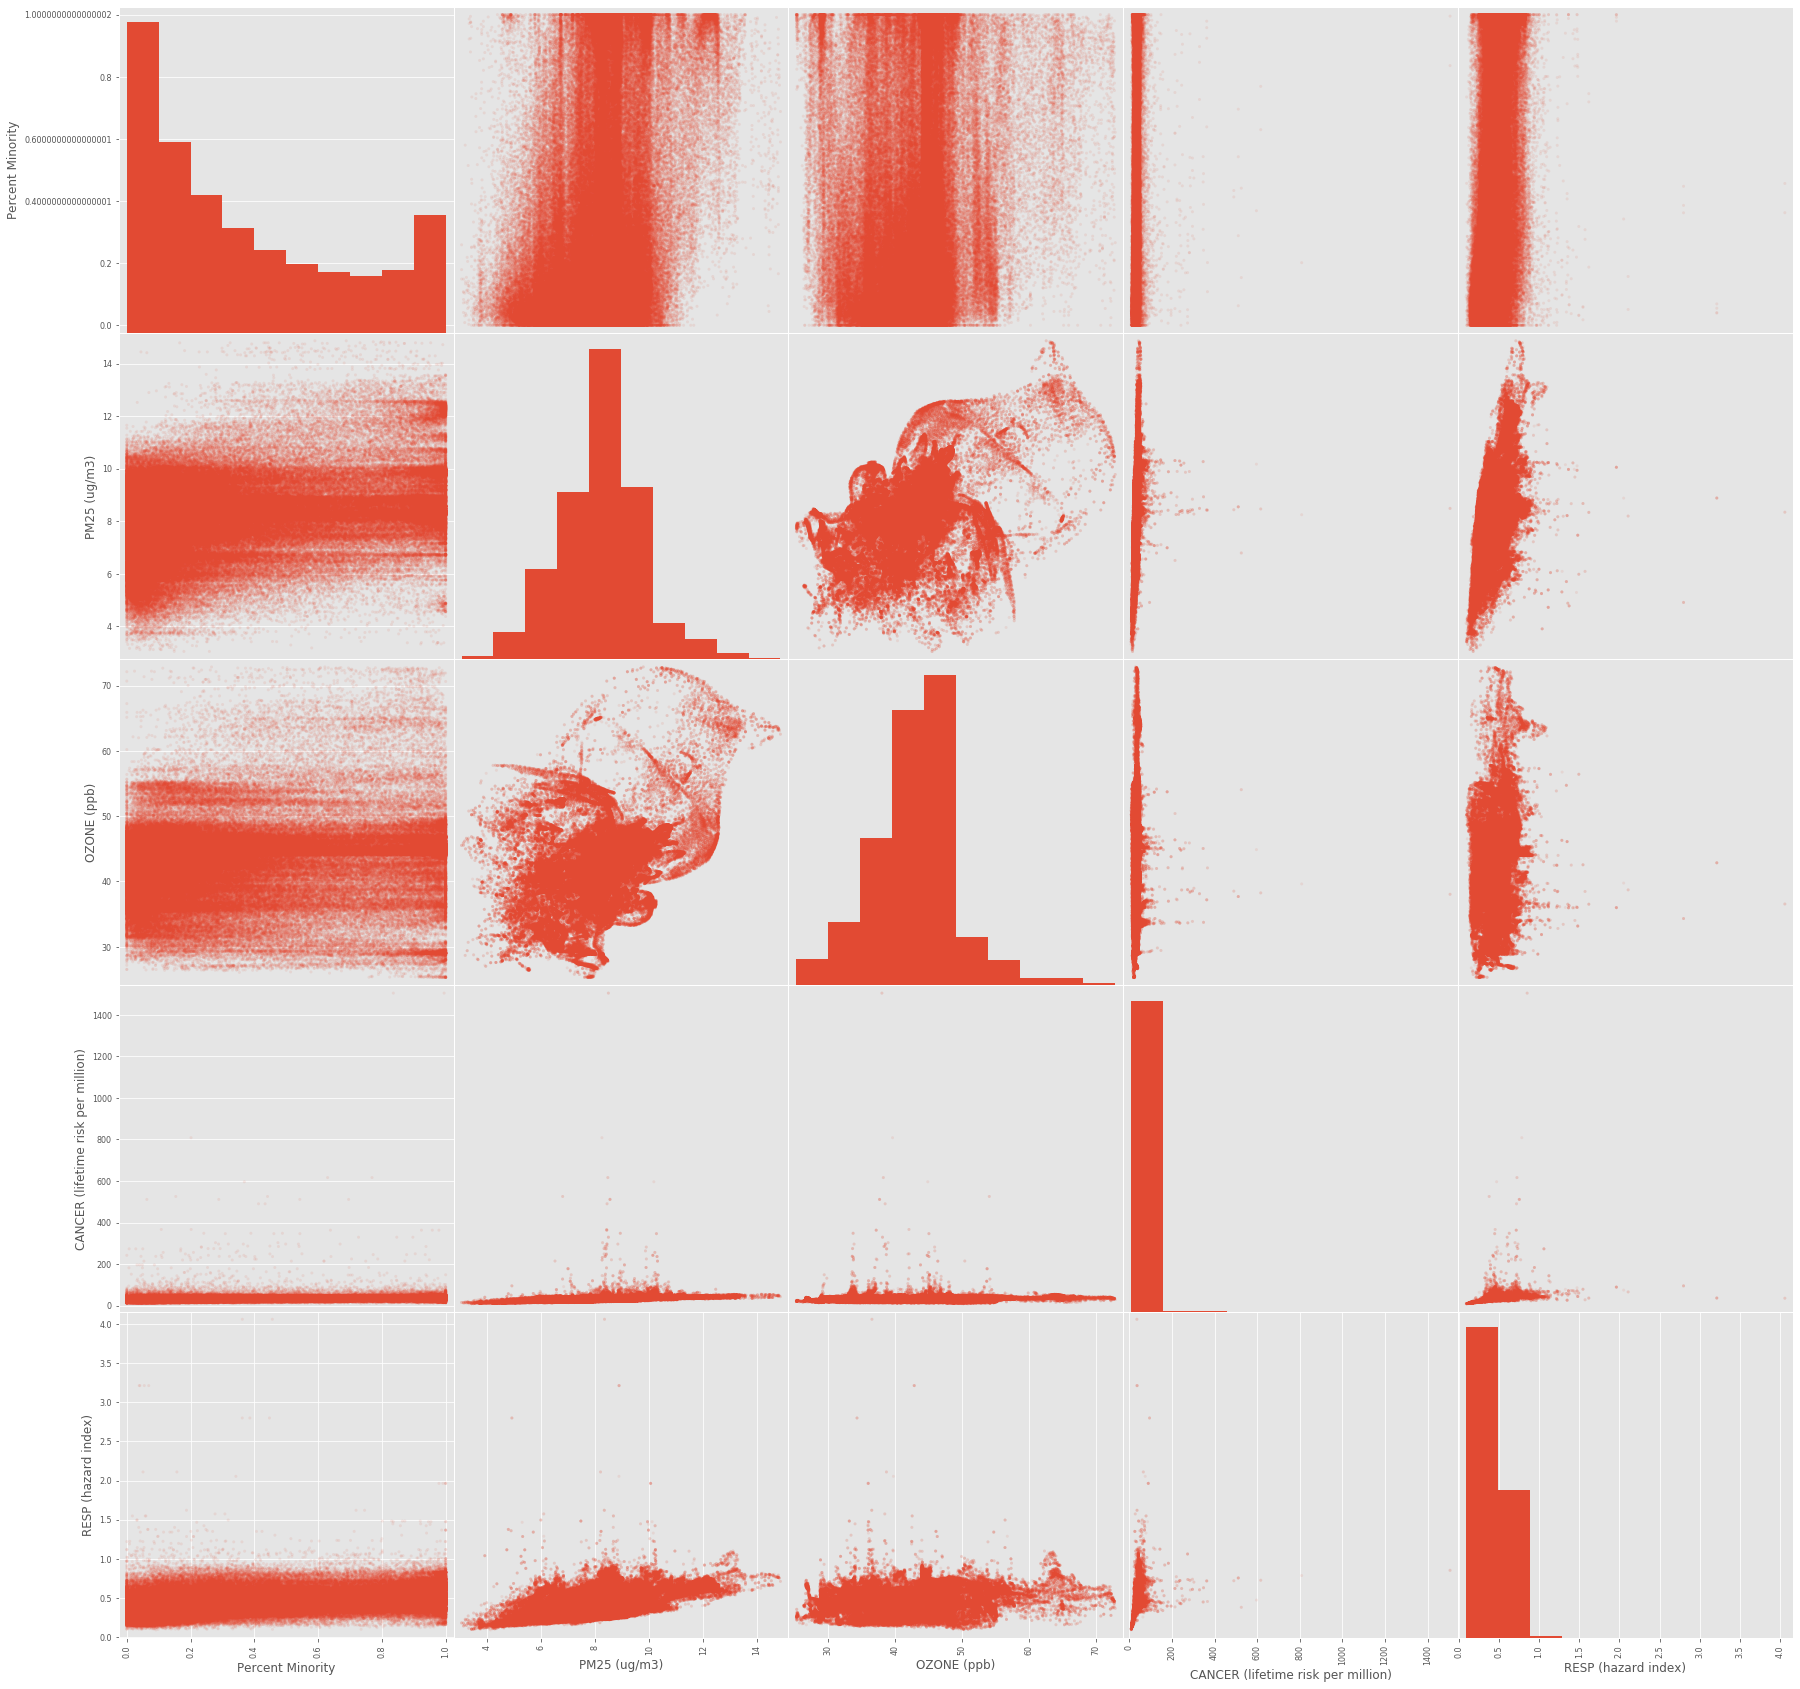

In [18]:
#scatter matrix of selected indicators for all block groups
pd.plotting.scatter_matrix(df[scatter_cols_testing], figsize=(30,30), alpha=0.1);


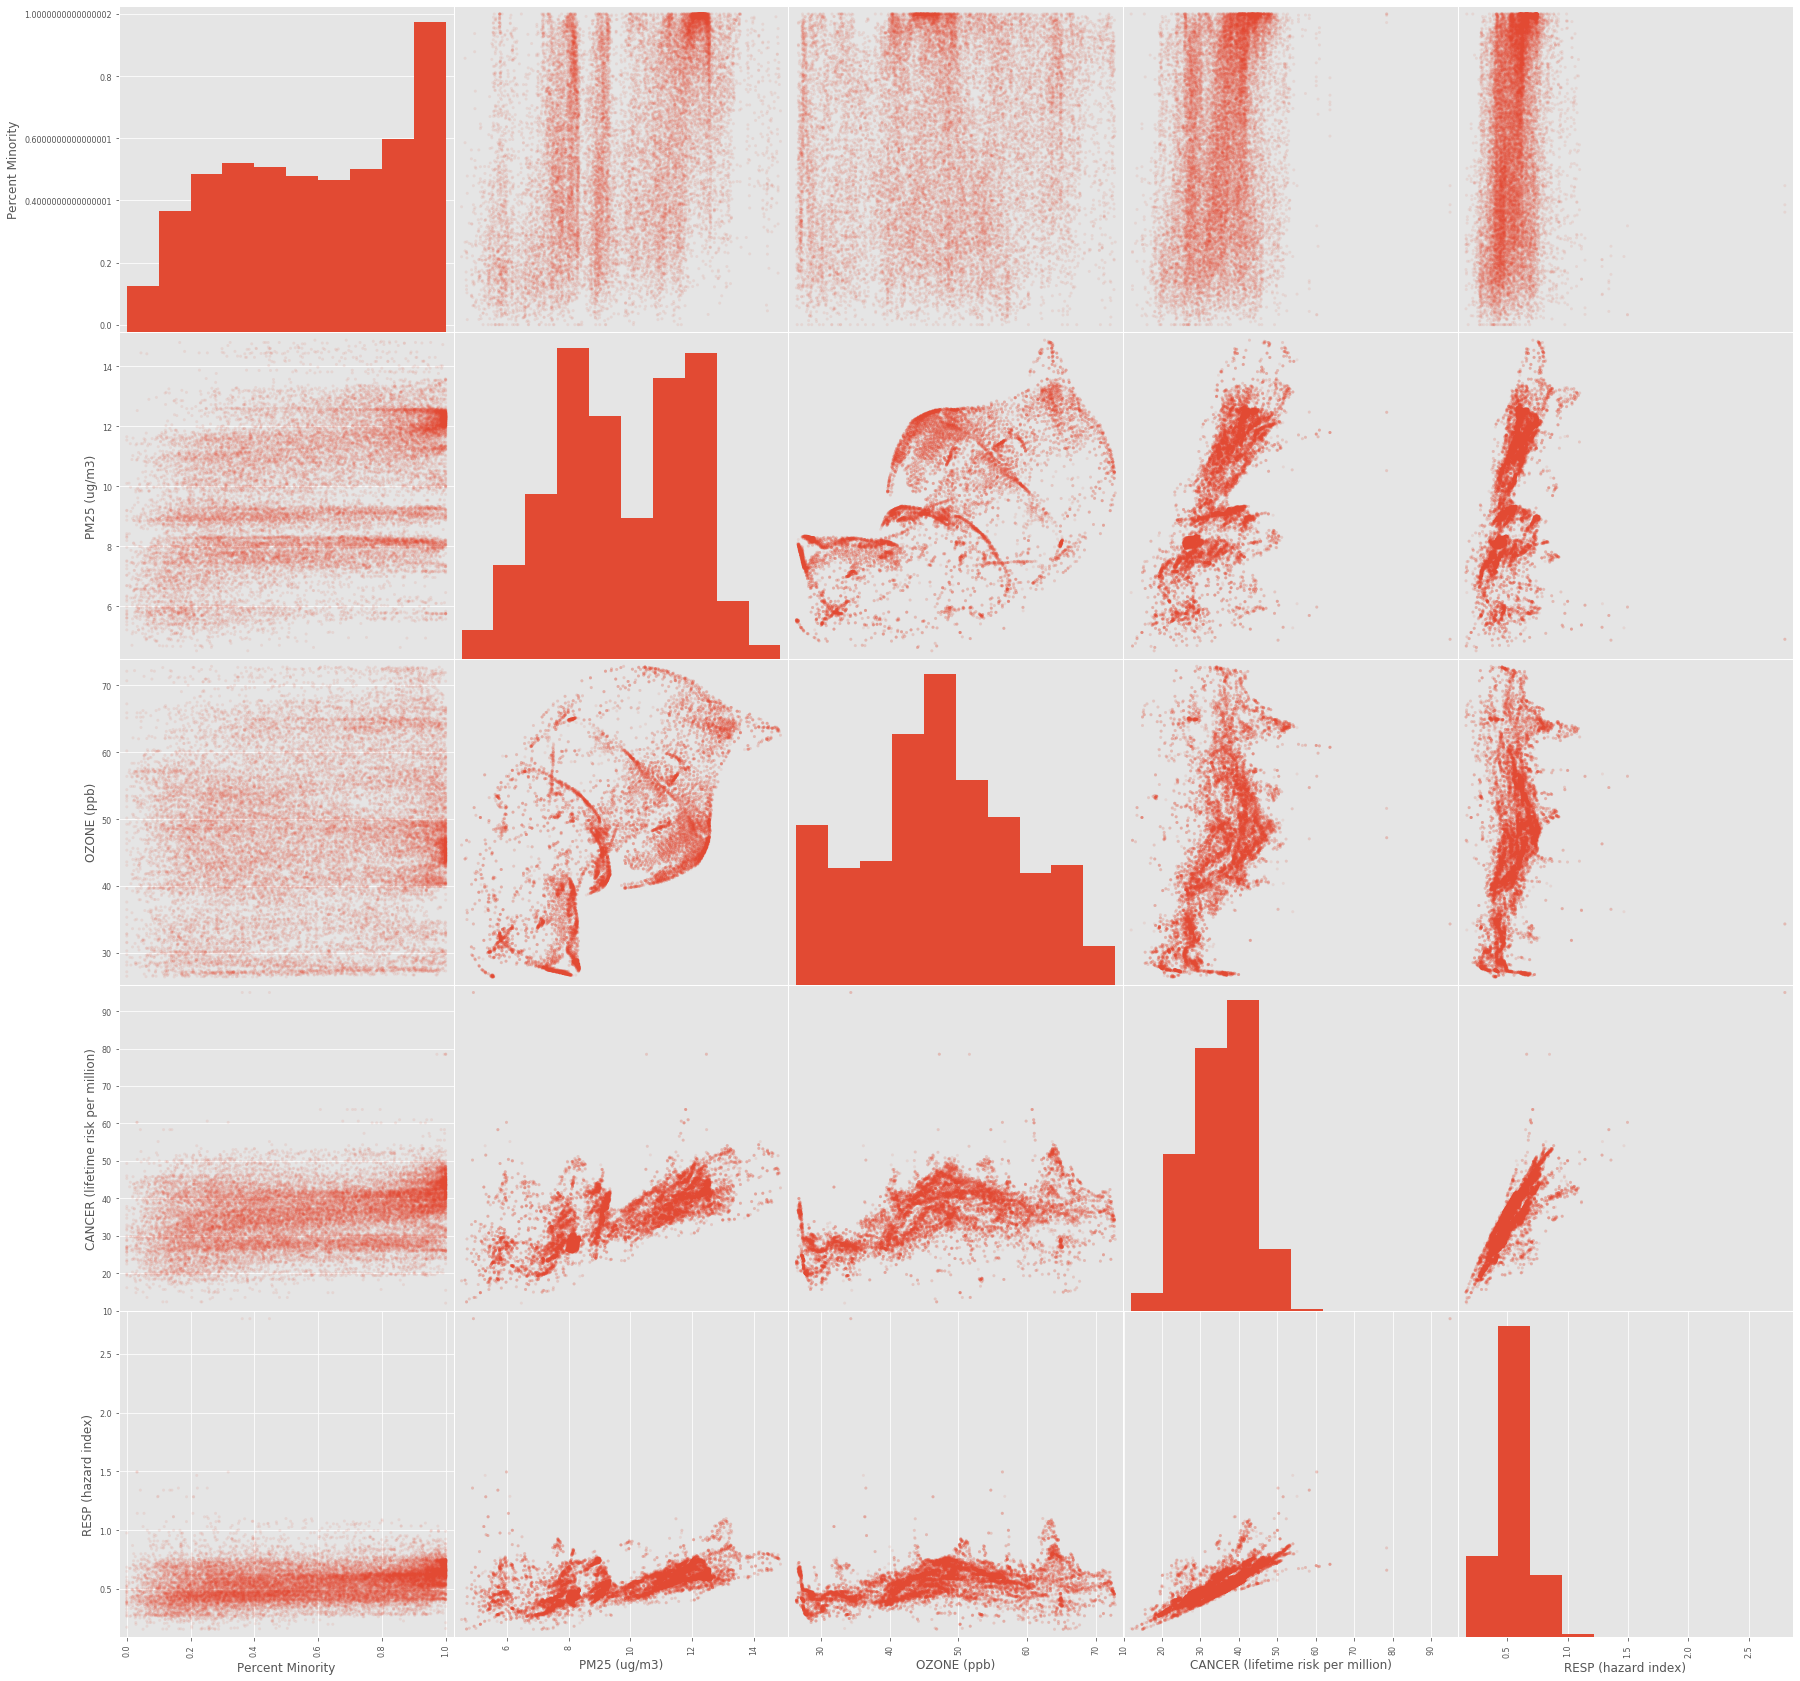

In [19]:
#state of ca scatter matrix of selected indicators

pd.plotting.scatter_matrix(df_ca[scatter_cols_testing], figsize=(30,30), alpha=0.1);

# sns.pairplot(df_ca[scatter_cols_testing])


plt.savefig('images/ca_scatter_matrix.jpg')

plt.show()

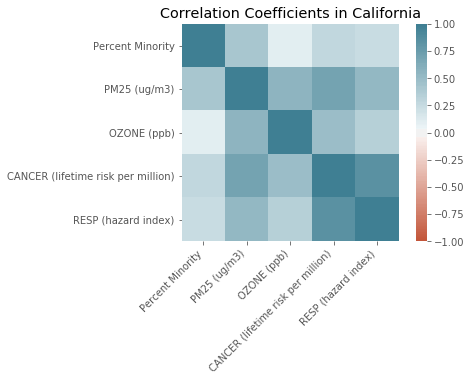

In [21]:
plot_correlation_coefficients(df_ca[scatter_cols_testing],
                             'Correlation Coefficients in California',
                             'images/ca_corr_matrix.jpg')

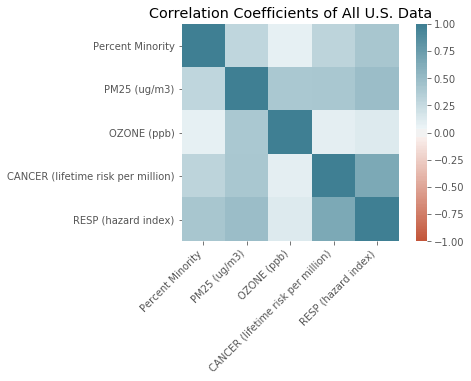

In [23]:
plot_correlation_coefficients(df[scatter_cols_testing],
                             'Correlation Coefficients of All U.S. Data',
                             'images/us_corr_matrix.jpg')

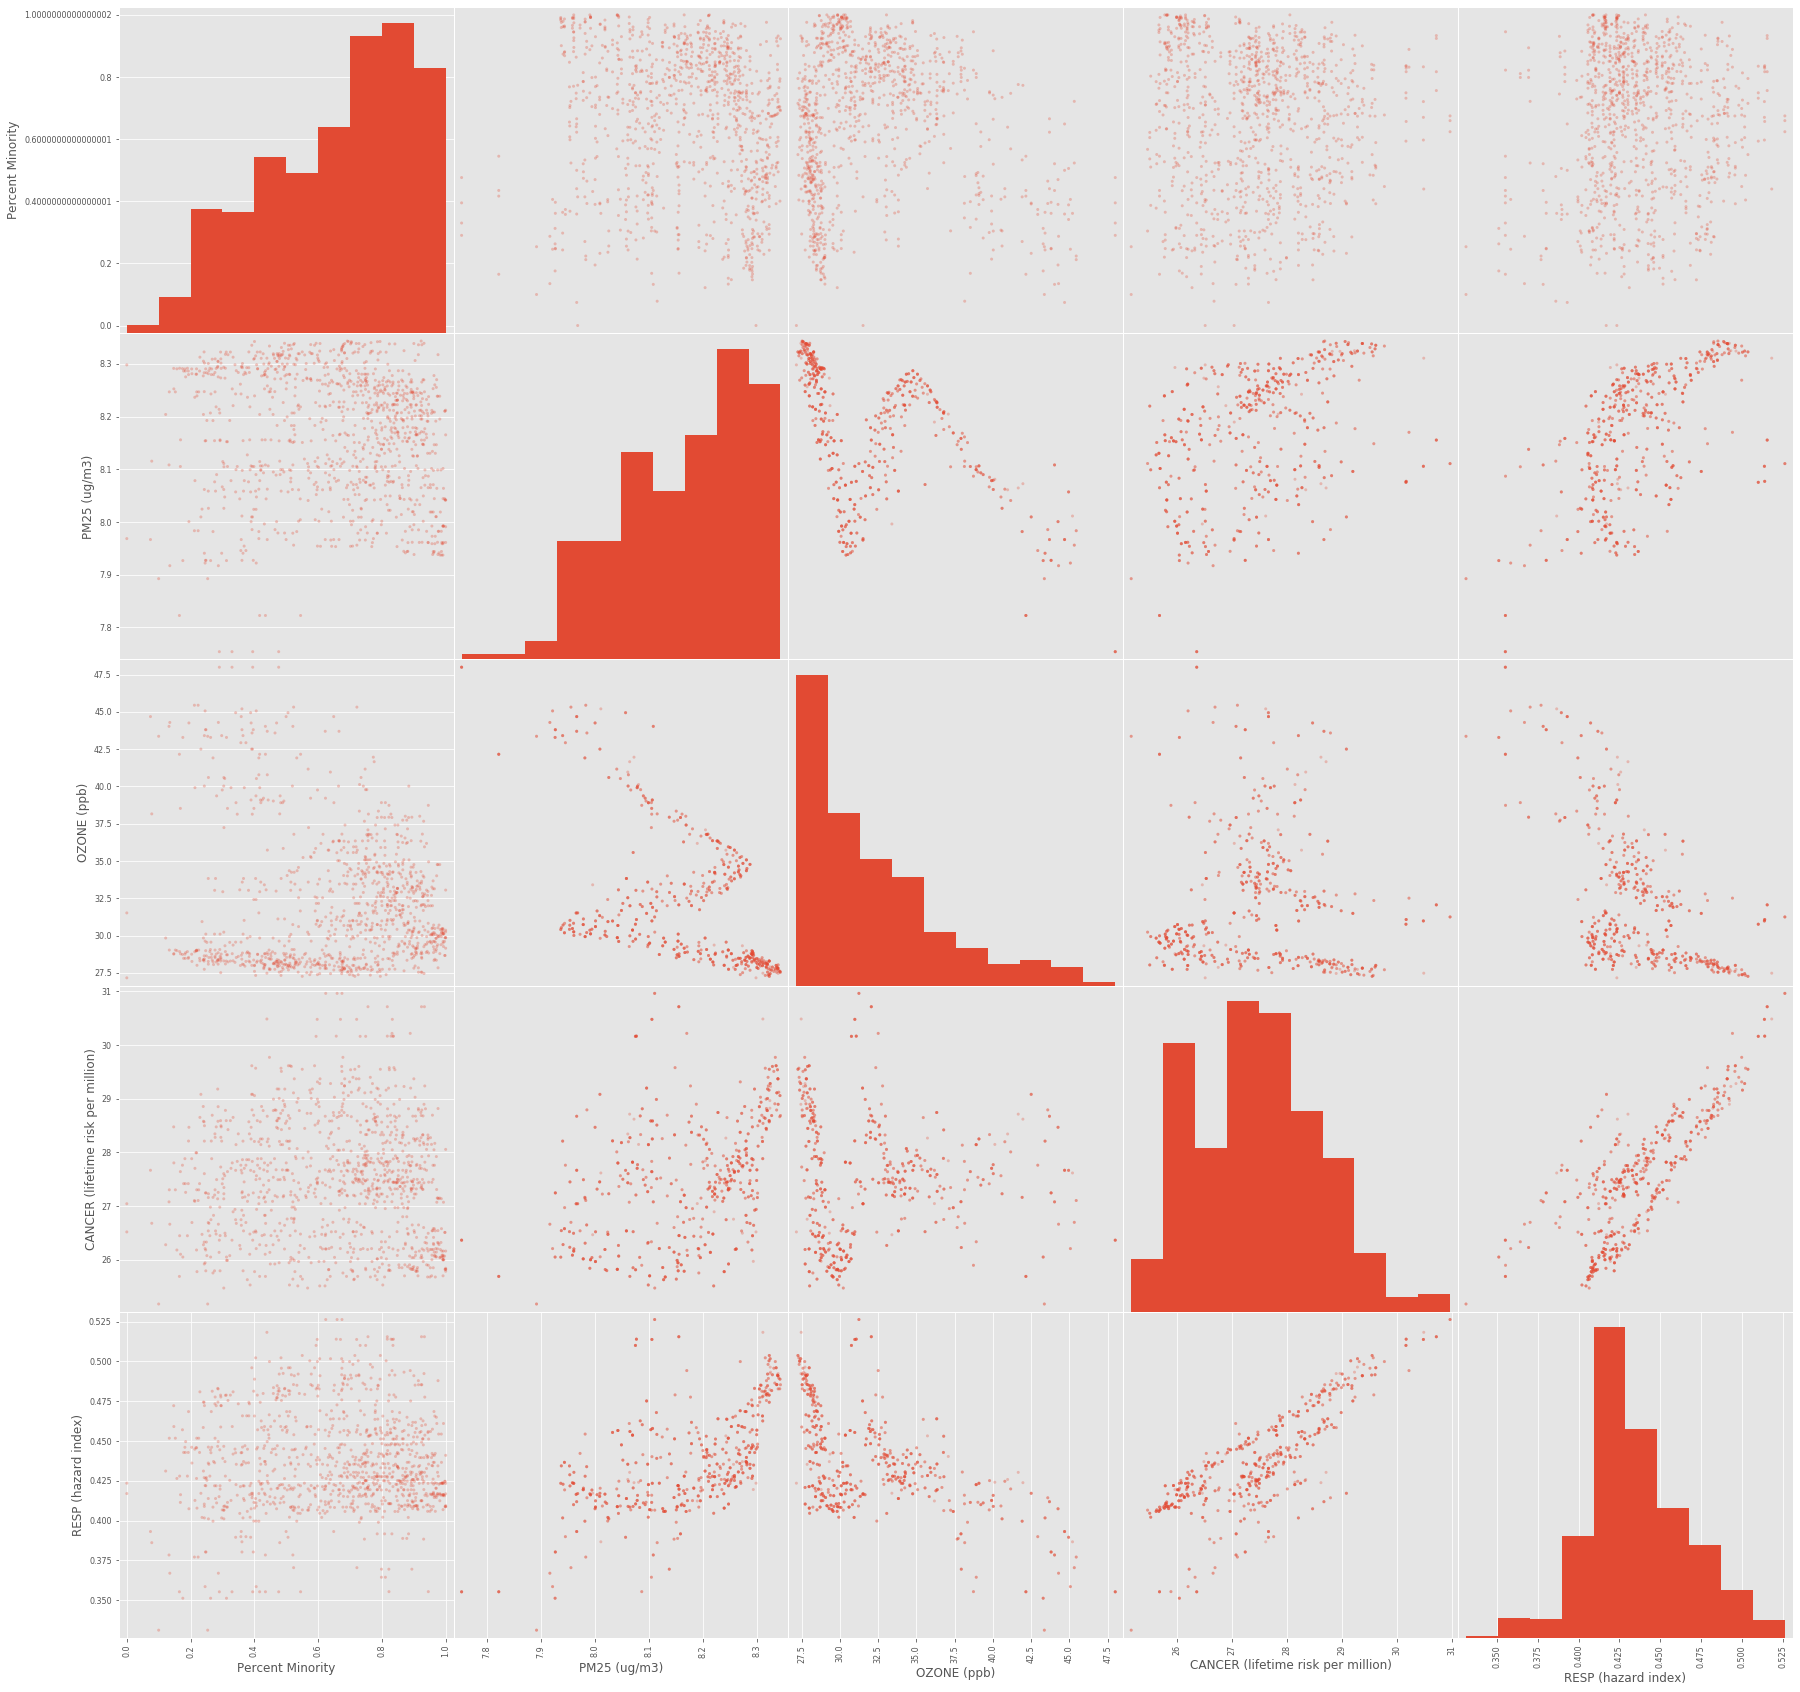

In [22]:
#alameda county scatter matrix
pd.plotting.scatter_matrix(df_alameda[scatter_cols_testing], alpha = 0.3, figsize=(30,30));

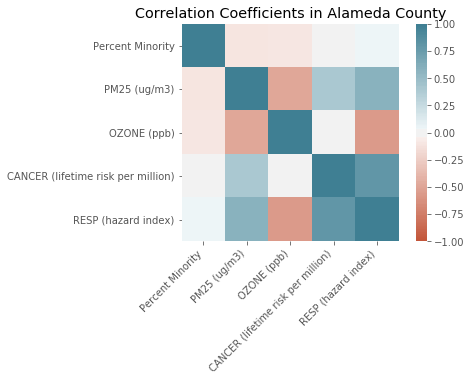

In [25]:
plot_correlation_coefficients(df_alameda[scatter_cols_testing],
                             'Correlation Coefficients in Alameda County',
                             'images/alameda_corr_matrix.jpg')

In [27]:
#group df by state
grouped_by_state = df.groupby(['STATE_NAME'])

In [28]:
#mean state df
mean_states = grouped_by_state.mean()

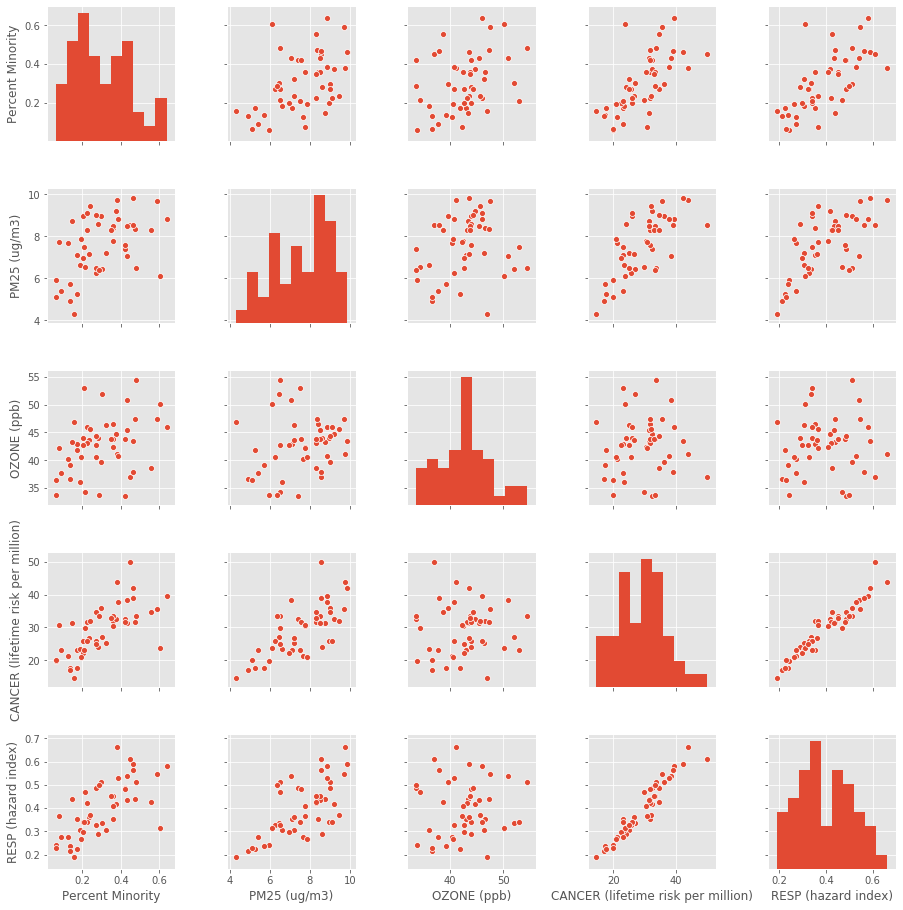

In [26]:
#scatter matrix for mean data for each state
sns.pairplot(mean_states[scatter_cols_testing])
plt.savefig('images/mean_states_scatter_matrix.jpg')
plt.show()


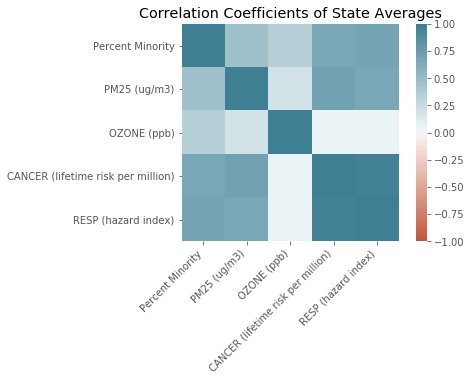

In [29]:
plot_correlation_coefficients(mean_states[scatter_cols_testing],
                             'Correlation Coefficients of State Averages',
                             'images/mean_states_corr_matrix.jpg')

In [31]:
#50 most diverse (highest % minority) and least diverse (lowest % minority) block groups
most_diverse = df.sort_values(by=['Percent Minority']).tail(50)
least_diverse = df.sort_values(by=['Percent Minority']).head(50)


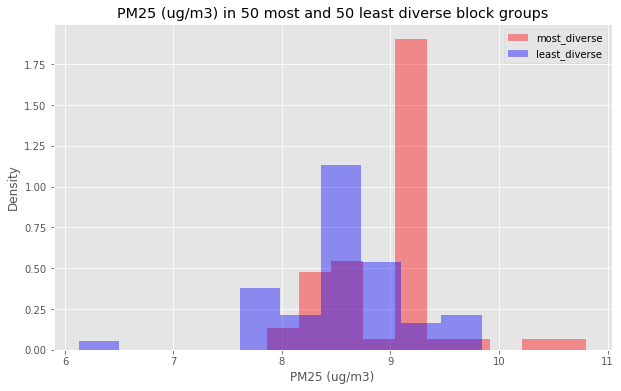

In [33]:
series_list = [most_diverse['PM25 (ug/m3)'], least_diverse['PM25 (ug/m3)']]
color_list = ['red', 'blue']
label_list = ['most_diverse', 'least_diverse']
fig, ax = plt.subplots(figsize=(10,6))
plot_histogram(series_list, color_list, label_list, x_label='PM25 (ug/m3)', 
               y_label='Density',
               title='PM25 (ug/m3) in 50 most and 50 least diverse block groups',
              path_to_file='images/pm25_hist_50most_50least.png',
              n_bins=10,
              ax=ax)



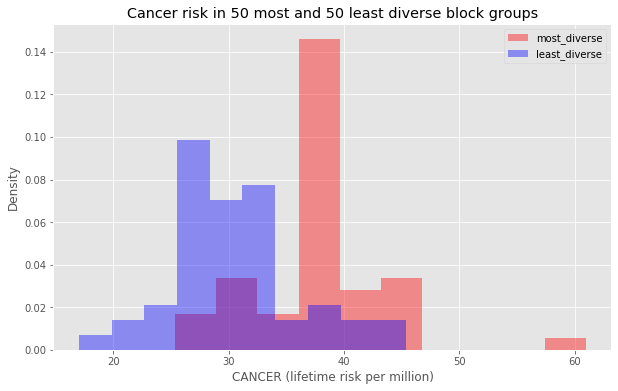

In [34]:
series_list = [most_diverse['CANCER (lifetime risk per million)'], least_diverse['CANCER (lifetime risk per million)']]
color_list = ['red', 'blue']
label_list = ['most_diverse', 'least_diverse']
fig, ax = plt.subplots(figsize=(10,6))
plot_histogram(series_list, color_list, label_list, x_label='CANCER (lifetime risk per million)',
               y_label='Density',
               title='Cancer risk in 50 most and 50 least diverse block groups',
              path_to_file='images/cancer_hist_50most_50least.png',
              n_bins=10, ax=ax)


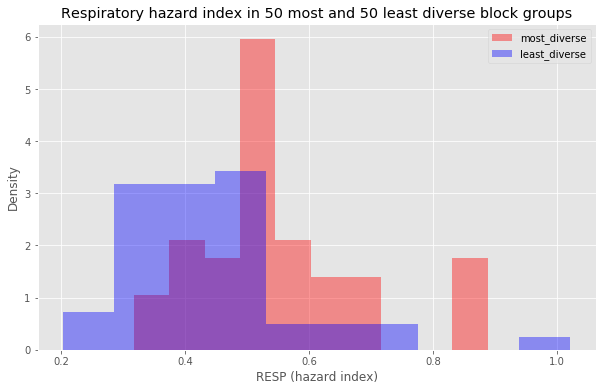

In [36]:
series_list = [most_diverse['RESP (hazard index)'], least_diverse['RESP (hazard index)']]
color_list = ['red', 'blue']
label_list = ['most_diverse', 'least_diverse']
fig, ax = plt.subplots(figsize=(10,6))
plot_histogram(series_list, color_list, label_list, x_label='RESP (hazard index)',
               y_label='Density',
               title='Respiratory hazard index in 50 most and 50 least diverse block groups',
              path_to_file='images/resp_hist_50most_50least.png', 
              n_bins=10, ax=ax)


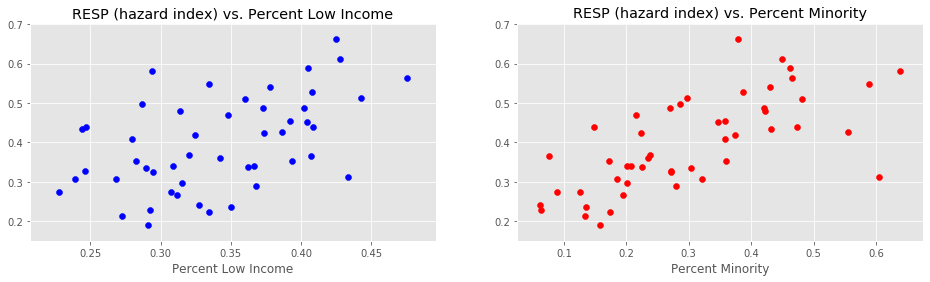

In [39]:
x_list = [mean_states['Percent Low Income'], mean_states['Percent Minority']]
y_list = [mean_states['RESP (hazard index)'], mean_states['RESP (hazard index)']]
color_list = ['blue', 'red']
xlabel_list = ['Percent Low Income', 'Percent Minority']
title_list = ['RESP (hazard index) vs. Percent Low Income', 'RESP (hazard index) vs. Percent Minority' ]

#call function
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
multiple_scatter_plots(x_list, y_list, color_list, xlabel_list, title_list, 
                       path_to_file='images/scatter_resp.png', ax=ax)



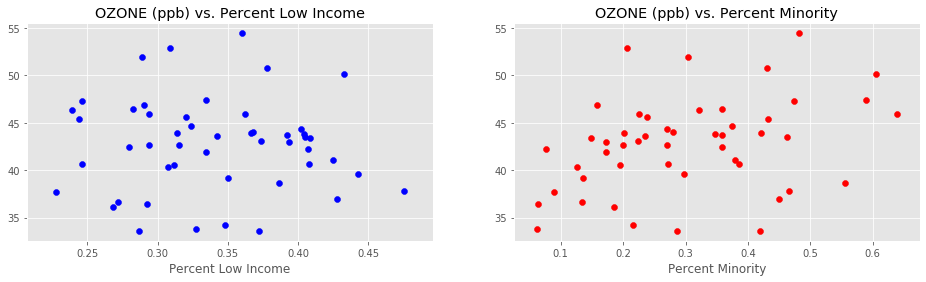

In [42]:
x_list = [mean_states['Percent Low Income'], mean_states['Percent Minority']]
y_list = [mean_states['OZONE (ppb)'], mean_states['OZONE (ppb)']]
color_list = ['blue', 'red']
xlabel_list = ['Percent Low Income', 'Percent Minority']
title_list = ['OZONE (ppb) vs. Percent Low Income', 'OZONE (ppb) vs. Percent Minority' ]

#call function
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
multiple_scatter_plots(x_list, y_list, color_list, xlabel_list, title_list, 
                       path_to_file='images/scatter_ozone.png', ax=ax)


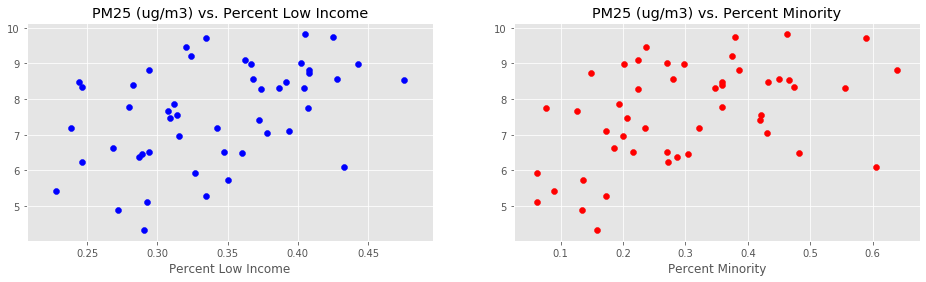

In [44]:
x_list = [mean_states['Percent Low Income'], mean_states['Percent Minority']]
y_list = [mean_states['PM25 (ug/m3)'], mean_states['PM25 (ug/m3)']]
color_list = ['blue', 'red']
xlabel_list = ['Percent Low Income', 'Percent Minority']
title_list = ['PM25 (ug/m3) vs. Percent Low Income', 'PM25 (ug/m3) vs. Percent Minority']

#call function
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
multiple_scatter_plots(x_list, y_list, color_list, xlabel_list, title_list, 
                       path_to_file='images/scatter_pm25.png', ax=ax)


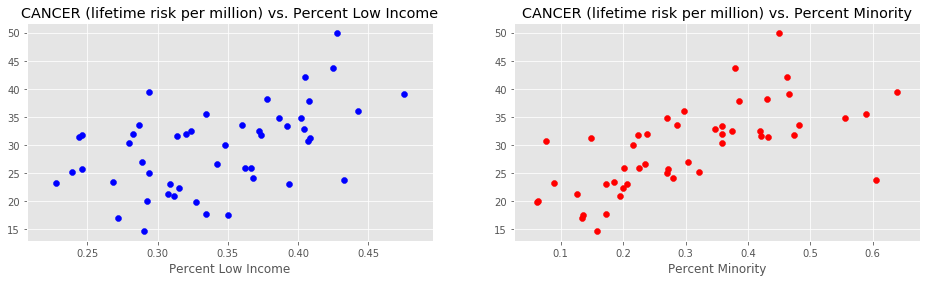

In [46]:
x_list = [mean_states['Percent Low Income'], mean_states['Percent Minority']]
y_list = [mean_states['CANCER (lifetime risk per million)'], mean_states['CANCER (lifetime risk per million)']]
color_list = ['blue', 'red']
xlabel_list = ['Percent Low Income', 'Percent Minority']
title_list = ['CANCER (lifetime risk per million) vs. Percent Low Income', 
              'CANCER (lifetime risk per million) vs. Percent Minority']

#call function
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
multiple_scatter_plots(x_list, y_list, color_list, xlabel_list, title_list, 
                       path_to_file='images/scatter_cancer.png', ax=ax)


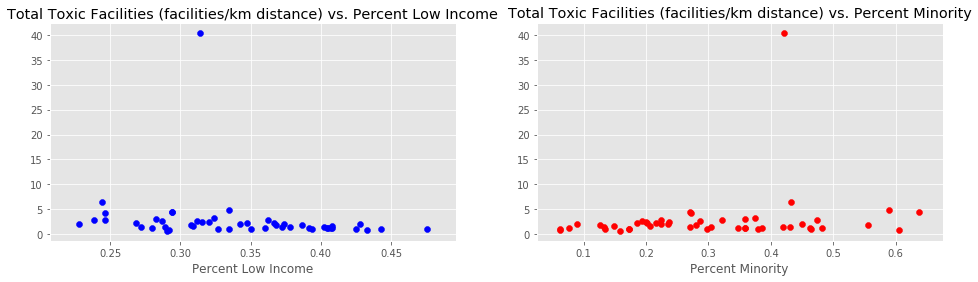

In [48]:
x_list = [mean_states['Percent Low Income'], mean_states['Percent Minority']]
y_list = [mean_states['Total Toxic Facilities (facilities/km distance)'], 
          mean_states['Total Toxic Facilities (facilities/km distance)']]
color_list = ['blue', 'red']
xlabel_list = ['Percent Low Income', 'Percent Minority']
title_list = ['Total Toxic Facilities (facilities/km distance) vs. Percent Low Income', 
              'Total Toxic Facilities (facilities/km distance) vs. Percent Minority']

#call function
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
multiple_scatter_plots(x_list, y_list, color_list, xlabel_list, title_list, 
                       path_to_file='images/scatter_toxic_facilities.png', ax=ax)


In [50]:
df['0-25% minority'] = df['Percent Minority'] < .25
df['25-50% minority'] = (df['Percent Minority'] > .25) & (df['Percent Minority'] < .5)
df['50-75% minority'] = (df['Percent Minority'] >= .5) & (df['Percent Minority'] < .75)
df['75-100% minority'] = df['Percent Minority'] >= .75


df['0-25% low-income'] = df['Percent Low Income'] < .25
df['25-50% low-income'] = (df['Percent Low Income'] > .25) & (df['Percent Low Income'] < .5)
df['50-75% low-income'] = (df['Percent Low Income'] >= .5) & (df['Percent Low Income'] < .75)
df['75-100% low-income'] = df['Percent Low Income'] >= .75



In [51]:
under25_min_pct = df[df['0-25% minority'] == True]
to50_min_pct = df[df['25-50% minority'] == True]
to75_min_pct = df[df['50-75% minority'] == True]
to100_min_pct = df[df['75-100% minority'] == True]
# under25_min_pct.count(), to50_min_pct.count(), to75_min_pct.count(), to100_min_pct.count()

In [52]:
under25_lowin_pct = df[df['0-25% low-income'] == True]
to50_lowin_pct = df[df['25-50% low-income'] == True]
to75_lowin_pct = df[df['50-75% low-income'] == True]
to100_lowin_pct = df[df['75-100% low-income'] == True]
# under25_lowin_pct.count(), to50_lowin_pct.count(), to75_lowin_pct.count(), to100_lowin_pct.count()

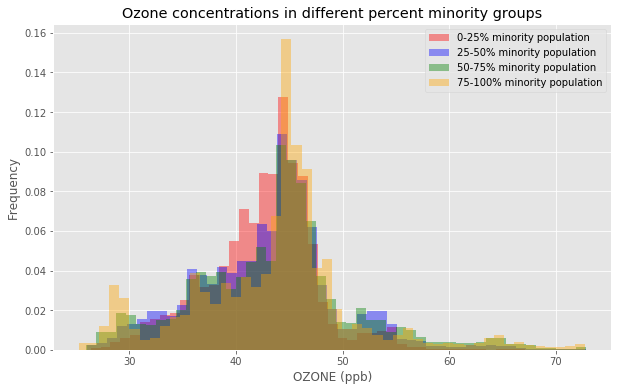

In [53]:
series_list = [under25_min_pct['OZONE (ppb)'], to50_min_pct['OZONE (ppb)'], 
               to75_min_pct['OZONE (ppb)'], to100_min_pct['OZONE (ppb)']]
color_list = ['red', 'blue', 'green', 'orange']
label_list = ['0-25% minority population', '25-50% minority population',
             '50-75% minority population', '75-100% minority population']

fig, ax = plt.subplots(figsize=(10,6))

plot_histogram(series_list, color_list, label_list, 
               x_label='OZONE (ppb)', 
               y_label = 'Frequency',
               title='Ozone concentrations in different percent minority groups', 
               path_to_file='images/ozone_histogram1.jpg', n_bins=50, ax=ax)


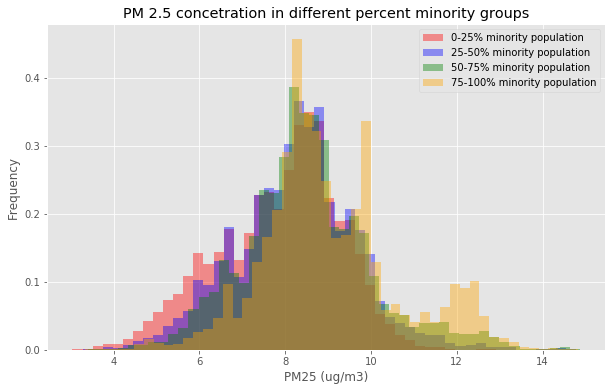

In [55]:
series_list = [under25_min_pct['PM25 (ug/m3)'], to50_min_pct['PM25 (ug/m3)'], 
               to75_min_pct['PM25 (ug/m3)'], to100_min_pct['PM25 (ug/m3)']]
color_list = ['red', 'blue', 'green', 'orange']
label_list = ['0-25% minority population', '25-50% minority population',
             '50-75% minority population', '75-100% minority population']

fig, ax = plt.subplots(figsize=(10,6))

plot_histogram(series_list, color_list, label_list, 
               x_label='PM25 (ug/m3)', 
               y_label = 'Frequency',
               title='PM 2.5 concetration in different percent minority groups', 
               path_to_file='images/pm25_histogram1.jpg', n_bins=50, ax=ax)


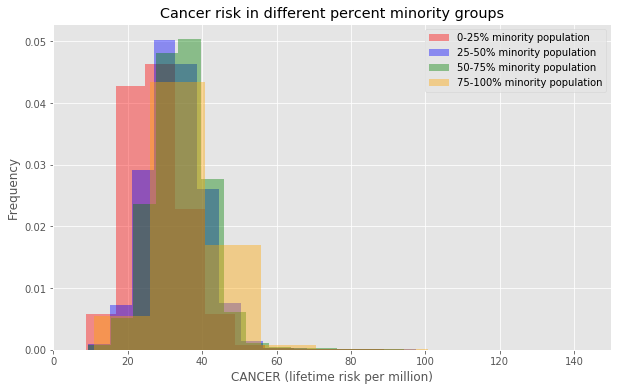

In [57]:
series_list = [under25_min_pct['CANCER (lifetime risk per million)'], 
               to50_min_pct['CANCER (lifetime risk per million)'], 
               to75_min_pct['CANCER (lifetime risk per million)'], 
               to100_min_pct['CANCER (lifetime risk per million)']]
color_list = ['red', 'blue', 'green', 'orange']
label_list = ['0-25% minority population', '25-50% minority population',
             '50-75% minority population', '75-100% minority population']

fig, ax = plt.subplots(figsize=(10,6))
plt.xlim(0, 150)
plot_histogram(series_list, color_list, label_list, 
               x_label='CANCER (lifetime risk per million)', 
               y_label = 'Frequency',
               title='Cancer risk in different percent minority groups', 
               path_to_file='images/cancer_histogram1.jpg', n_bins=100, ax=ax)


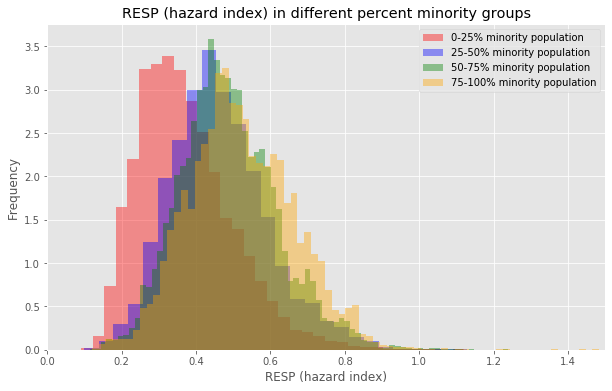

In [59]:
series_list = [under25_min_pct['RESP (hazard index)'], 
               to50_min_pct['RESP (hazard index)'], 
               to75_min_pct['RESP (hazard index)'], 
               to100_min_pct['RESP (hazard index)']]
color_list = ['red', 'blue', 'green', 'orange']
label_list = ['0-25% minority population', '25-50% minority population',
             '50-75% minority population', '75-100% minority population']

fig, ax = plt.subplots(figsize=(10,6))
plt.xlim(0, 1.5)
plot_histogram(series_list, color_list, label_list, 
               x_label='RESP (hazard index)', 
               y_label = 'Frequency',
               title='RESP (hazard index) in different percent minority groups', 
               path_to_file='images/resp_histogram1.jpg', n_bins=100, ax=ax)


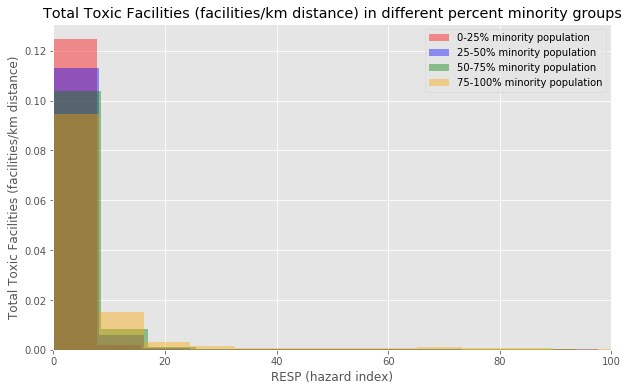

In [61]:
series_list = [under25_min_pct['Total Toxic Facilities (facilities/km distance)'], 
               to50_min_pct['Total Toxic Facilities (facilities/km distance)'], 
               to75_min_pct['Total Toxic Facilities (facilities/km distance)'], 
               to100_min_pct['Total Toxic Facilities (facilities/km distance)']]
color_list = ['red', 'blue', 'green', 'orange']
label_list = ['0-25% minority population', '25-50% minority population',
             '50-75% minority population', '75-100% minority population']

fig, ax = plt.subplots(figsize=(10,6))
plt.xlim(0, 100)
plot_histogram(series_list, color_list, label_list, 
               x_label='RESP (hazard index)', 
               y_label = 'Total Toxic Facilities (facilities/km distance)',
               title='Total Toxic Facilities (facilities/km distance) in different percent minority groups', 
               path_to_file='images/resp_histogram1.jpg', n_bins=50, ax=ax)


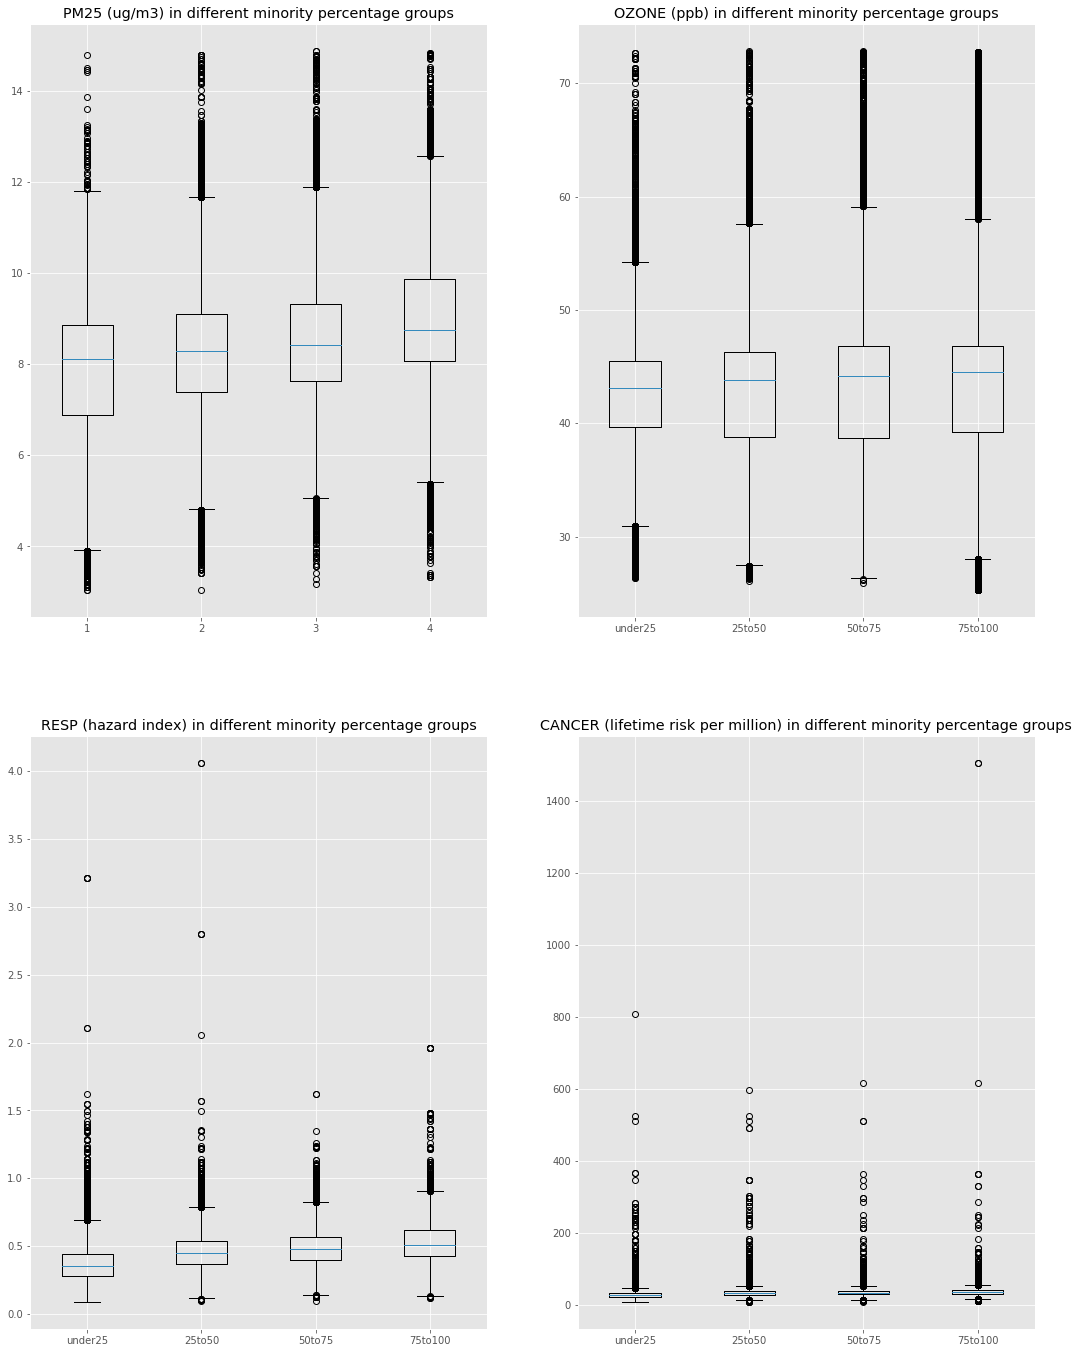

In [63]:
#box plots

fig, ax = plt.subplots(2, 2, figsize=(18, 24))
ax[0, 0].boxplot([list(under25_min_pct['PM25 (ug/m3)']), 
                  list(to50_min_pct['PM25 (ug/m3)']), 
                  list(to75_min_pct['PM25 (ug/m3)']), 
                  list(to100_min_pct['PM25 (ug/m3)'])])
ax[0, 0].set_xticks([1,2,3,4])
ax[0, 0].set_title('PM25 (ug/m3) in different minority percentage groups')
ax[0, 1].set_xticklabels(['under25', '25to50', '50to75', '75to100'])

ax[0, 1].boxplot([list(under25_min_pct['OZONE (ppb)']), 
                  list(to50_min_pct['OZONE (ppb)']), 
                  list(to75_min_pct['OZONE (ppb)']), 
                  list(to100_min_pct['OZONE (ppb)'])])
ax[0, 1].set_xticks([1,2,3,4])
ax[0, 1].set_title('OZONE (ppb) in different minority percentage groups')
ax[0, 1].set_xticklabels(['under25', '25to50', '50to75', '75to100'])

ax[1, 0].boxplot([list(under25_min_pct['RESP (hazard index)']), 
               list(to50_min_pct['RESP (hazard index)']), 
               list(to75_min_pct['RESP (hazard index)']), 
               list(to100_min_pct['RESP (hazard index)'])])
ax[1, 0].set_xticks([1,2,3,4])
ax[1, 0].set_title('RESP (hazard index) in different minority percentage groups')
ax[1, 0].set_xticklabels(['under25', '25to50', '50to75', '75to100'])

ax[1, 1].boxplot([list(under25_min_pct['CANCER (lifetime risk per million)']), 
               list(to50_min_pct['CANCER (lifetime risk per million)']), 
               list(to75_min_pct['CANCER (lifetime risk per million)']), 
               list(to100_min_pct['CANCER (lifetime risk per million)'])])
ax[1, 1].set_xticks([1,2,3,4])
ax[1, 1].set_title('CANCER (lifetime risk per million) in different minority percentage groups')
ax[1, 1].set_xticklabels(['under25', '25to50', '50to75', '75to100'])


plt.savefig('images/us_boxplots.jpg')


# Look at CA county averages.


In [46]:
ca_county_means = df_ca.groupby(['county']).mean()

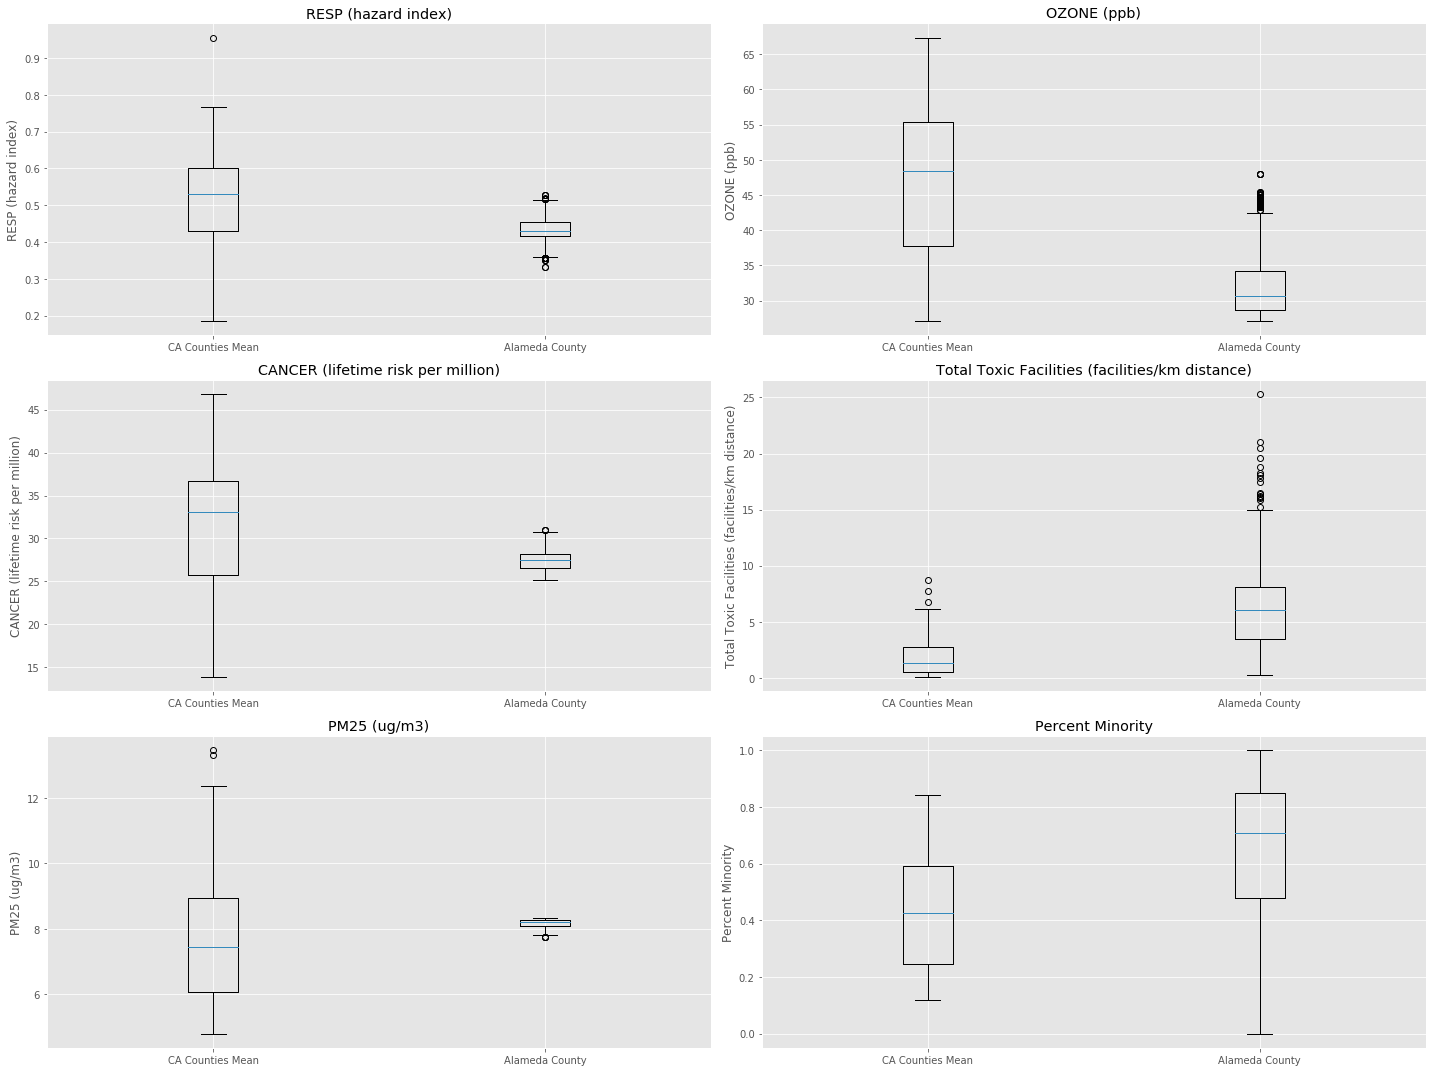

In [47]:
#box plots to compare ca counties. 

fig, ax = plt.subplots(3, 2, figsize=(20, 15))
ax[0, 0].boxplot([list(ca_county_means['RESP (hazard index)']), list(df_alameda['RESP (hazard index)'])])
ax[0, 0].set_xticks([1, 2])
ax[0, 0].set_title('RESP (hazard index)')
ax[0, 0].set_xticklabels(['CA Counties Mean', 'Alameda County'])
ax[0, 0].set_ylabel('RESP (hazard index)')

ax[1, 0].boxplot([list(ca_county_means['CANCER (lifetime risk per million)']), list(df_alameda['CANCER (lifetime risk per million)'])])
ax[1, 0].set_xticks([1, 2])
ax[1, 0].set_title('CANCER (lifetime risk per million)')
ax[1, 0].set_xticklabels(['CA Counties Mean', 'Alameda County'])
ax[1, 0].set_ylabel('CANCER (lifetime risk per million)')

ax[1, 1].boxplot([list(ca_county_means['Total Toxic Facilities (facilities/km distance)']), list(df_alameda['Total Toxic Facilities (facilities/km distance)'])])
ax[1, 1].set_xticks([1, 2])
ax[1, 1].set_title('Total Toxic Facilities (facilities/km distance)')
ax[1, 1].set_xticklabels(['CA Counties Mean', 'Alameda County'])
ax[1, 1].set_ylabel('Total Toxic Facilities (facilities/km distance)')

ax[0, 1].boxplot([list(ca_county_means['OZONE (ppb)']), list(df_alameda['OZONE (ppb)'])])
ax[0, 1].set_xticks([1, 2])
ax[0, 1].set_title('OZONE (ppb)')
ax[0, 1].set_xticklabels(['CA Counties Mean', 'Alameda County'])
ax[0, 1].set_ylabel('OZONE (ppb)')


ax[2, 0].boxplot([list(ca_county_means['PM25 (ug/m3)']), list(df_alameda['PM25 (ug/m3)'])])
ax[2, 0].set_xticks([1, 2])
ax[2, 0].set_title('PM25 (ug/m3)')
ax[2, 0].set_xticklabels(['CA Counties Mean', 'Alameda County'])
ax[2, 0].set_ylabel('PM25 (ug/m3)')

ax[2, 1].boxplot([list(ca_county_means['Percent Minority']), list(df_alameda['Percent Minority'])])
ax[2, 1].set_xticks([1, 2])
ax[2, 1].set_title('Percent Minority')
ax[2, 1].set_xticklabels(['CA Counties Mean', 'Alameda County']);
ax[2, 1].set_ylabel('Percent Minority')

plt.tight_layout()

plt.savefig('images/county_boxplots.jpg');


In [48]:
#CA data by county. 

#first, sort the data by percent minority
sorted_df = ca_county_means.sort_values(by='Percent Minority')

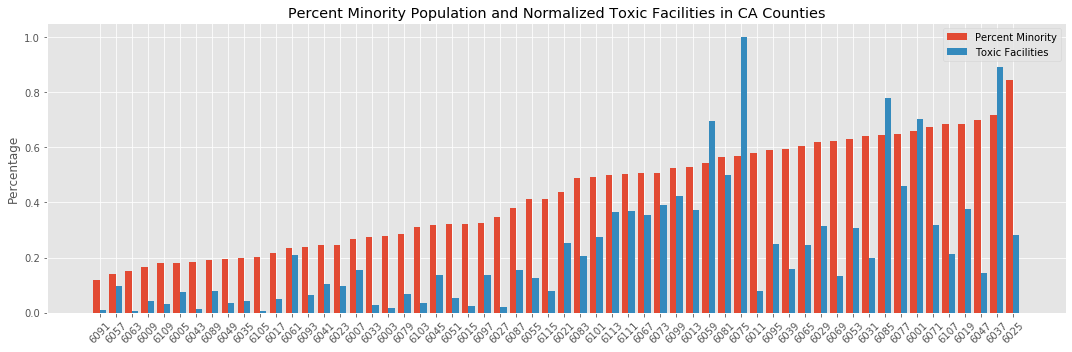

In [49]:
#plot
fig, ax = plt.subplots(figsize=(15, 5))
y1 = np.array(sorted_df['Percent Minority'])
y2= np.array(sorted_df['Total Toxic Facilities (facilities/km distance)']/
             (sorted_df['Total Toxic Facilities (facilities/km distance)'].max()))

x = np.array(sorted_df.index)
x_loc = np.arange(len(x))
width=0.4

plt.bar(x_loc, y1, width, label='Percent Minority')
plt.bar(x_loc + width, y2, width, label='Toxic Facilities')

ax.set_ylabel('Percentage')
ax.set_title('Percent Minority Population and Normalized Toxic Facilities in CA Counties')
plt.xticks(x_loc + width / 2, x, rotation=45)

ax.legend()

fig.tight_layout()
plt.savefig('images/facilities_counties_bar.jpg')

plt.show()


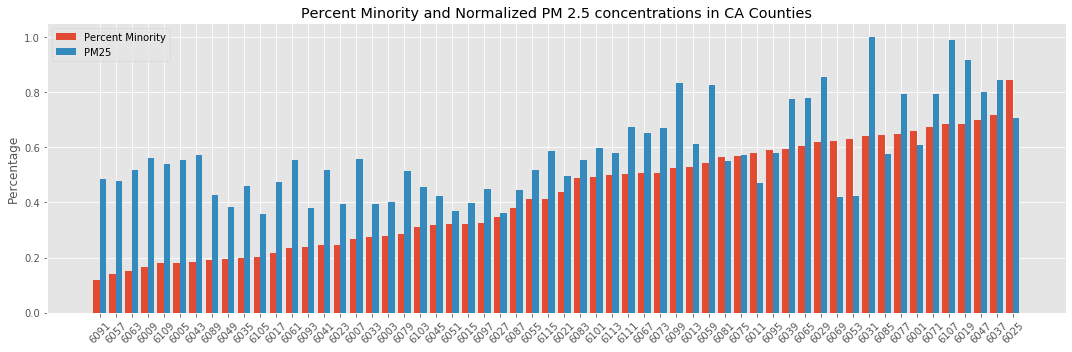

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))
y1 = np.array(sorted_df['Percent Minority'])
y2= np.array(sorted_df['PM25 (ug/m3)']/
             (sorted_df['PM25 (ug/m3)'].max()))

x = np.array(sorted_df.index)
x_loc = np.arange(len(x))
width=0.4

plt.bar(x_loc, y1, width, label='Percent Minority')
plt.bar(x_loc + width, y2, width, label='PM25')

ax.set_ylabel('Percentage')
ax.set_title('Percent Minority and Normalized PM 2.5 concentrations in CA Counties')
plt.xticks(x_loc + width / 2, x, rotation=45)

ax.legend()


fig.tight_layout()
plt.savefig('images/pm25_counties_bar.jpg')

plt.show()


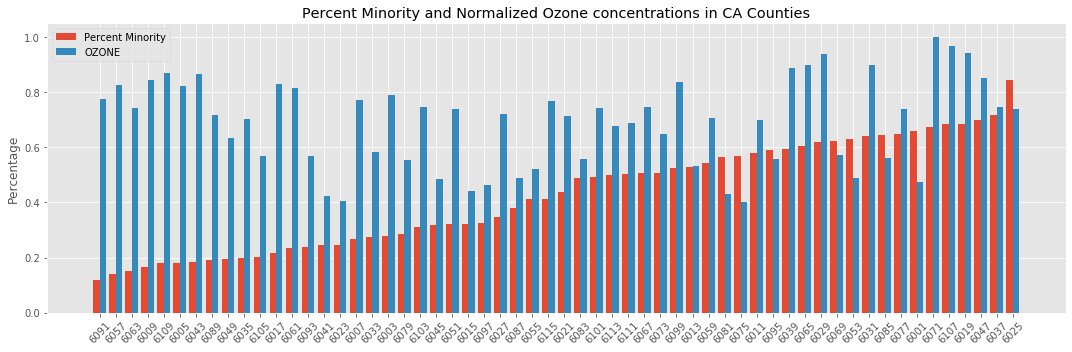

In [51]:
fig, ax = plt.subplots(figsize=(15, 5))
y1 = np.array(sorted_df['Percent Minority'])
y2= np.array(sorted_df['OZONE (ppb)']/
             (sorted_df['OZONE (ppb)'].max()))

x = np.array(sorted_df.index)
x_loc = np.arange(len(x))
width=0.4

plt.bar(x_loc, y1, width, label='Percent Minority')
plt.bar(x_loc + width, y2, width, label='OZONE')

ax.set_ylabel('Percentage')
ax.set_title('Percent Minority and Normalized Ozone concentrations in CA Counties')
plt.xticks(x_loc + width / 2, x, rotation=45)

ax.legend()

fig.tight_layout()
plt.savefig('images/ozone_counties_bar.jpg')

plt.show()

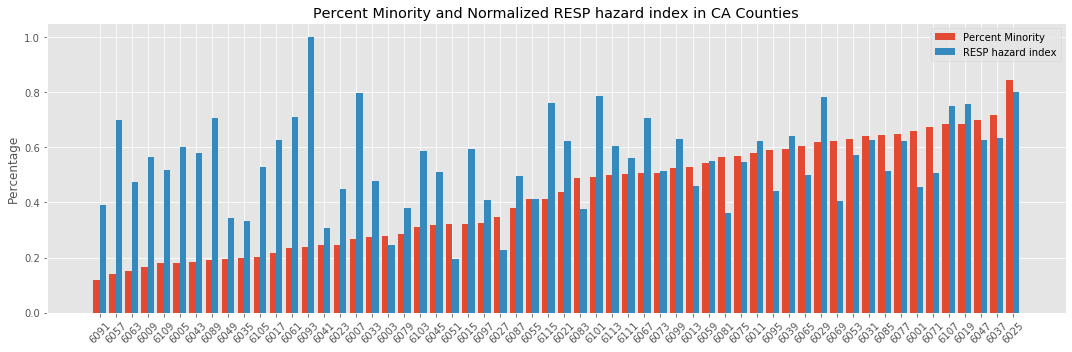

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))
y1 = np.array(sorted_df['Percent Minority'])
y2= np.array(sorted_df['RESP (hazard index)']/
             (sorted_df['RESP (hazard index)'].max()))

x = np.array(sorted_df.index)
x_loc = np.arange(len(x))
width=0.4

plt.bar(x_loc, y1, width, label='Percent Minority')
plt.bar(x_loc + width, y2, width, label='RESP hazard index')

ax.set_ylabel('Percentage')
ax.set_title('Percent Minority and Normalized RESP hazard index in CA Counties')
plt.xticks(x_loc + width / 2, x, rotation=45)

ax.legend()


fig.tight_layout()
plt.savefig('images/resp_counties_bar.jpg')

plt.show()

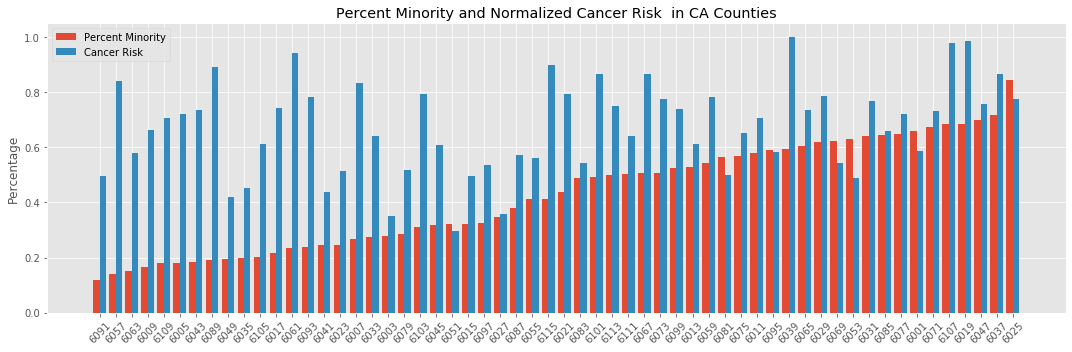

In [53]:
fig, ax = plt.subplots(figsize=(15, 5))
y1 = np.array(sorted_df['Percent Minority'])
y2= np.array(sorted_df['CANCER (lifetime risk per million)']/
             (sorted_df['CANCER (lifetime risk per million)'].max()))

x = np.array(sorted_df.index)
x_loc = np.arange(len(x))
width=0.4

plt.bar(x_loc, y1, width, label='Percent Minority')
plt.bar(x_loc + width, y2, width, label='Cancer Risk')

ax.set_ylabel('Percentage')
ax.set_title('Percent Minority and Normalized Cancer Risk  in CA Counties')
plt.xticks(x_loc + width / 2, x, rotation=45)

ax.legend()


fig.tight_layout()
plt.savefig('images/cancer_counties_bar.jpg')

plt.show()

# Hypothesis Test #1: Resp hazard index in low minority/high minority groups
- H_0: the average respiratory hazard index in low minority groups is equal to the average respiratory hazard index in high minority groups

- H_a: the average respiratory hazard index in high minority groups is greater than the average respiratory hazard index in low minority groups

In [54]:
#split into 2 groups for hypothesis testing: % minority less than/greater than 50%.

low_minority_groups = df[df['Percent Minority'] < 0.5]
high_minority_groups = df[df['Percent Minority'] >= 0.5]
high_minority_groups

ID state county census tract STATE_NAME  Total Population  \
2        10010202001     1   1001   1001020200    Alabama              1020   
3        10010202002     1   1001   1001020200    Alabama              1152   
29       10010211001     1   1001   1001021100    Alabama              1925   
30       10010211002     1   1001   1001021100    Alabama               486   
32       10030101001     1   1003   1003010100    Alabama               524   
...              ...   ...    ...          ...        ...               ...   
217438  560139402023    56  56013  56013940202    Wyoming              1420   
217439  560139402024    56  56013  56013940202    Wyoming              1232   
217474  560210002001    56  56021  56021000200    Wyoming              1219   
217510  560210011001    56  56021  56021001100    Wyoming               394   
217706  560399678002    56  56039  56039967800    Wyoming              1470   

        Percent Minority  Percent Low Income  PM25 (ug/m3)  OZONE (ppb)  \
2               0.667647            0.559606     10.070060    40.223949   
3               0.509549            0.322884     10.070060    40.223949   
29              0.575584            0.555325      9.472607    38.777994   
30              0.798354            0.312757      9.472607    38.777994   
32              0.895038            0.767176      8.564632    35.536067   
...                  ...                 ...           ...          ...   
217438          0.906338            0.530410      3.783832    45.345654   
217439          0.626623            0.564082      3.783832    45.345654   
217474          0.557014            0.496308      4.927406    49.202385   
217510          0.527919            0.746193      4.837922    49.396222   
217706          0.602721            0.498639      4.842666    45.211382   

        DSLPM (ug/m3)  CANCER (lifetime risk per million)  \
2            0.304313                           50.320741   
3            0.304313                           50.320741   
29           0.168696                           46.636540   
30           0.168696                           46.636540   
32           0.182177                           41.812088   
...               ...                                 ...   
217438       0.029392                           13.597329   
217439       0.029392                           13.597329   
217474       0.446263                           16.505236   
217510       0.270166                           14.588758   
217706       0.045207                           13.118552   

        RESP (hazard index)  LDPNT (fraction pre-1960)  \
2                  0.808744                   0.135135   
3                  0.808744                   0.254777   
29                 0.758933                   0.097730   
30                 0.758933                   0.070485   
32                 0.640497                   0.259174   
...                     ...                        ...   
217438             0.157535                   0.155211   
217439             0.157535                   0.103261   
217474             0.254811                   0.380952   
217510             0.197640                   0.230769   
217706             0.154379                   0.038043   

        PNPL (facilities/km distance)  PRMP (facilities/km distance)  \
2                            0.069234                       0.077868   
3                            0.075614                       0.086918   
29                           0.034970                       0.081066   
30                           0.023544                       0.099544   
32                           0.047726                       0.051476   
...                               ...                            ...   
217438                       0.005445                       0.385145   
217439                       0.005702                       0.207351   
217474                       0.167161                       1.159994   
217510            

In [55]:
# find the mean RESP hazard index for each group.
mean_resp_low_minority= low_minority_groups['RESP (hazard index)'].mean()
mean_resp_high_minority= high_minority_groups['RESP (hazard index)'].mean()
resp_effect_size= abs(mean_resp_high_minority - mean_resp_low_minority)
print(f'mean RESP low minority groups: {mean_resp_low_minority}')
print(f'mean RESP high minority groups: {mean_resp_high_minority}')


mean RESP low minority groups: 0.39996004212858105
mean RESP high minority groups: 0.508863170703668


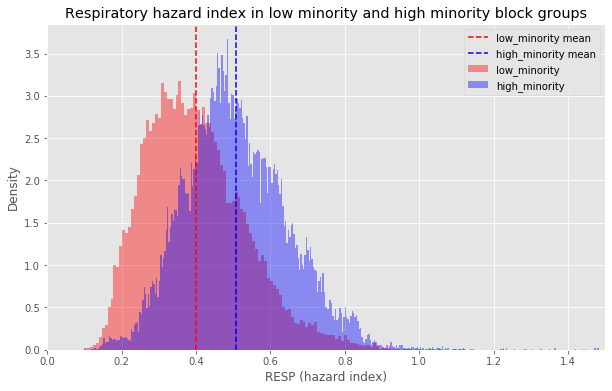

In [56]:
#Compare the distribution of RESP hazard index in low and high minority groups.
#normalized histograms
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(low_minority_groups['RESP (hazard index)'], alpha=0.4, color='red', label='low_minority', density=True, bins=500)
ax.hist(high_minority_groups['RESP (hazard index)'], alpha=0.4, color='blue', label='high_minority', density=True, bins=500)
ax.axvline(mean_resp_low_minority, label='low_minority mean', color='red', ls='--')
ax.axvline(mean_resp_high_minority, label='high_minority mean', color='blue', ls='--')
ax.set_xlabel('RESP (hazard index)')
ax.set_ylabel('Density')
ax.legend()
plt.xlim(0, 1.5)
ax.set_title('Respiratory hazard index in low minority and high minority block groups')
;

plt.savefig('images/resp_hist2.jpg')


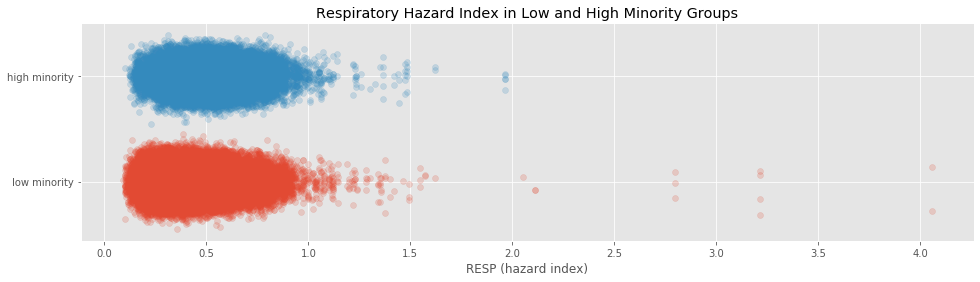

In [57]:
#code taken from lecture code for the "gitter" in the scatter plot

# Compare the distribution of RESP hazard index in low and high minority groups.
#scatter plot
low_len = len(low_minority_groups['RESP (hazard index)'])
high_len = len(high_minority_groups['RESP (hazard index)'])
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.scatter(low_minority_groups['RESP (hazard index)'], np.repeat(0, low_len) + np.random.normal(0, 0.1, low_len), alpha=0.2)
ax.scatter(high_minority_groups['RESP (hazard index)'], np.repeat(1, high_len) + np.random.normal(0, 0.1, high_len), alpha=0.2)
ax.set_xlabel('RESP (hazard index)')
ax.set_title('Respiratory Hazard Index in Low and High Minority Groups')
ax.set_yticks([0, 1])
ax.set_yticklabels(['low minority', 'high minority']);


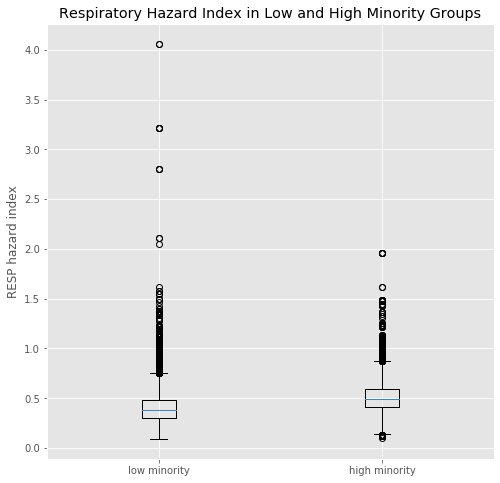

In [58]:
# Compare the distribution of RESP hazard index in low and high minority groups.
#box plot
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.boxplot([low_minority_groups['RESP (hazard index)'], high_minority_groups['RESP (hazard index)']])
ax.set_xticks([1,2])
ax.set_ylabel('RESP hazard index')
ax.set_title('Respiratory Hazard Index in Low and High Minority Groups')
ax.set_xticklabels(['low minority', 'high minority']);
plt.savefig('images/resp_boxplot1.jpg')



In [59]:
#U Test: RESP hazard index
#H_0: low minority groups are equally likely to have higher RESP 
#index as high minority groups and vice versa

res = stats.mannwhitneyu(low_minority_groups['RESP (hazard index)'], 
      high_minority_groups['RESP (hazard index)'], alternative='two-sided')
print(res)
print("p-value for low minority RESP < high minority RESP: {:2.3f}".format(res.pvalue))


MannwhitneyuResult(statistic=2739036753.0, pvalue=0.0)
p-value for low minority RESP < high minority RESP: 0.000


In [60]:
#TTest: RESP hazard index
#can assume Normal distribution of means since sample size so large (<100,000)
test_statistic, p_value = stats.ttest_ind(low_minority_groups['RESP (hazard index)'], 
                          high_minority_groups['RESP (hazard index)'], equal_var=False)

print(f'test_statistic: {test_statistic}, p_value: {p_value}')
print(f'mean RESP low minority groups: {mean_resp_low_minority}')
print(f'mean RESP high minority groups: {mean_resp_high_minority}')
print(f'effect size: {resp_effect_size}')
print(f'effect size is {round((resp_effect_size/mean_resp_low_minority) * 100, 3)} % of the mean')



test_statistic: -167.5736510686619, p_value: 0.0
mean RESP low minority groups: 0.39996004212858105
mean RESP high minority groups: 0.508863170703668
effect size: 0.108903128575087
effect size is 27.229 % of the mean


In [61]:
#standard error of each sample
standard_error_low_minority_resp = np.std(np.array(low_minority_groups['RESP (hazard index)']))/(len(low_minority_groups['RESP (hazard index)'])**0.5)
standard_error_high_minority_resp = np.std(np.array(high_minority_groups['RESP (hazard index)']))/(len(high_minority_groups['RESP (hazard index)'])**0.5)
print(f'standard error of low minority RESP hazard index: {standard_error_low_minority_resp}')
print(f'standard error of high minority RESP hazard index: {standard_error_high_minority_resp}')


standard error of low minority RESP hazard index: 0.00035812468633756857
standard error of high minority RESP hazard index: 0.0005422990412737917


## Hypothesis Test #2: Cancer risk in low minority/high minority groups

- H_0: the average cancer risk in low minority groups is equal to the average cancer risk in high minority groups

- H_a: the average cancer risk in high minority groups is greater than the average cancer risk in low minority groups

In [62]:
#U Test: Cancer

res = stats.mannwhitneyu(low_minority_groups['CANCER (lifetime risk per million)'], 
      high_minority_groups['CANCER (lifetime risk per million)'], alternative='two-sided')
print(res)
print("p-value: {:2.3f}".format(res.pvalue))


MannwhitneyuResult(statistic=2807928821.0, pvalue=0.0)
p-value: 0.000


In [63]:
#TTest: Cancer

test_statistic, p_value = stats.ttest_ind(low_minority_groups['CANCER (lifetime risk per million)'], 
                          high_minority_groups['CANCER (lifetime risk per million)'], equal_var=False)


#effect size
mean_cancer_low_minority= low_minority_groups['CANCER (lifetime risk per million)'].mean()
mean_cancer_high_minority= high_minority_groups['CANCER (lifetime risk per million)'].mean()
cancer_effect_size= abs(mean_cancer_high_minority - mean_cancer_low_minority)


print(f'test_statistic: {test_statistic}, p_value: {p_value}')
print(f'mean CANCER low minority groups: {mean_cancer_low_minority}')
print(f'mean CANCER high minority groups: {mean_cancer_high_minority}')
print(f'effect size: {cancer_effect_size}')
print(f'effect size is {round((cancer_effect_size/mean_cancer_low_minority) * 100, 3)} % of the mean')


#standard error of each sample
standard_error_low_minority_cancer = np.std(np.array(low_minority_groups['CANCER (lifetime risk per million)']))/(len(low_minority_groups['CANCER (lifetime risk per million)'])**0.5)
standard_error_high_minority_cancer = np.std(np.array(high_minority_groups['CANCER (lifetime risk per million)']))/(len(high_minority_groups['CANCER (lifetime risk per million)'])**0.5)
print(f'standard error of low minority CANCER risk: {standard_error_low_minority_cancer}')
print(f'standard error of high minority CANCER risk: {standard_error_high_minority_cancer}')


test_statistic: -104.28853349530664, p_value: 0.0
mean CANCER low minority groups: 29.621354023115188
mean CANCER high minority groups: 35.786826860941005
effect size: 6.165472837825817
effect size is 20.814 % of the mean
standard error of low minority CANCER risk: 0.02777902053291821
standard error of high minority CANCER risk: 0.05218601492407597


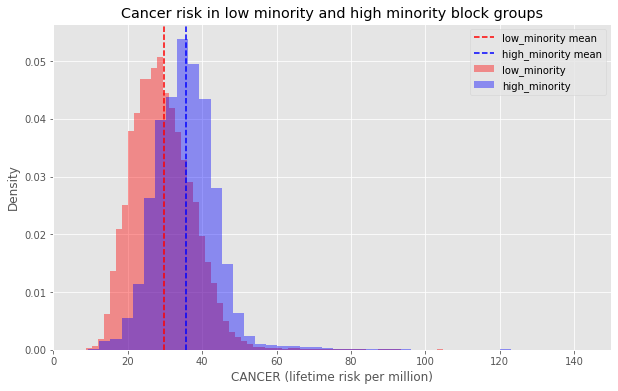

In [64]:
#Compare the distribution of RESP hazard index in low and high minority groups.
#normalized histograms
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(low_minority_groups['CANCER (lifetime risk per million)'], alpha=0.4, color='red', label='low_minority', density=True, bins=500)
ax.hist(high_minority_groups['CANCER (lifetime risk per million)'], alpha=0.4, color='blue', label='high_minority', density=True, bins=500)
ax.axvline(mean_cancer_low_minority, label='low_minority mean', color='red', ls='--')
ax.axvline(mean_cancer_high_minority, label='high_minority mean', color='blue', ls='--')
ax.set_xlabel('CANCER (lifetime risk per million)')
ax.set_ylabel('Density')
ax.legend()
plt.xlim(0, 150)
ax.set_title('Cancer risk in low minority and high minority block groups')
;

plt.savefig('images/cancer_hist2.jpg')


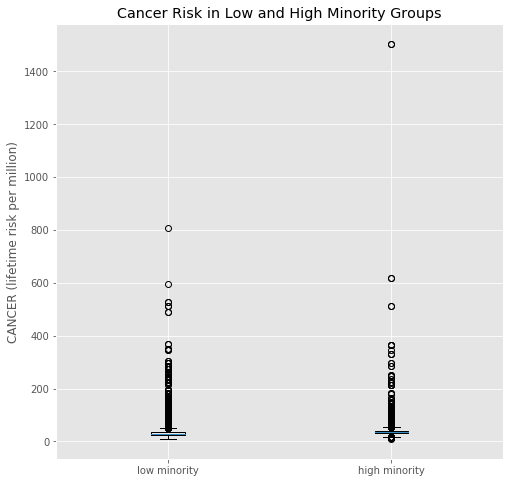

In [65]:
# Compare the distribution of RESP hazard index in low and high minority groups.
#box plot
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.boxplot([low_minority_groups['CANCER (lifetime risk per million)'], high_minority_groups['CANCER (lifetime risk per million)']])
ax.set_xticks([1,2])
ax.set_ylabel('CANCER (lifetime risk per million)')
ax.set_title('Cancer Risk in Low and High Minority Groups')
ax.set_xticklabels(['low minority', 'high minority']);
plt.savefig('images/cancer_boxplot1.jpg')



## Hypothesis Test #3: PM 2.5 in low minority/high minority groups

- H_0: the average PM 2.5 concentrations in low minority groups is equal to the average PM 2.5 concentrations in high minority groups

- H_a: the average PM 2.5 concentrations in high minority groups is greater than the average PM 2.5 concentrations in low minority groups


In [66]:
#U Test: PM 2.5

res = stats.mannwhitneyu(low_minority_groups['PM25 (ug/m3)'], 
      high_minority_groups['PM25 (ug/m3)'], alternative='two-sided')
print(res)
print("p-value: {:2.3f}".format(res.pvalue))


MannwhitneyuResult(statistic=3603882534.0, pvalue=0.0)
p-value: 0.000


In [67]:
#T test: PM 2.5

#H_0: low_min PM 2.5 levels = high_min PM 2.5 levels
test_statistic, p_value = stats.ttest_ind(low_minority_groups['PM25 (ug/m3)'], 
                          high_minority_groups['PM25 (ug/m3)'], equal_var=False)


#effect size
mean_pm25_low_minority= low_minority_groups['PM25 (ug/m3)'].mean()
mean_pm25_high_minority= high_minority_groups['PM25 (ug/m3)'].mean()
pm25_effect_size= abs(mean_pm25_high_minority - mean_pm25_low_minority)

print(f'test_statistic: {test_statistic}, p_value: {p_value}')
print(f'mean PM25 low minority groups: {mean_pm25_low_minority}')
print(f'mean PM25 high minority groups: {mean_pm25_high_minority}')
print(f'effect size: {pm25_effect_size}')
print(f'effect size is {round((pm25_effect_size/mean_pm25_low_minority) * 100, 3)} % of the mean')


#standard error of each sample
standard_error_low_minority_pm25 = np.std(np.array(low_minority_groups['PM25 (ug/m3)']))/(len(low_minority_groups['PM25 (ug/m3)'])**0.5)
standard_error_high_minority_pm25 = np.std(np.array(high_minority_groups['PM25 (ug/m3)']))/(len(high_minority_groups['PM25 (ug/m3)'])**0.5)
print(f'standard error of low minority PM25 (ug/m3): {standard_error_low_minority_pm25}')
print(f'standard error of high minority PM25 (ug/m3): {standard_error_high_minority_pm25}')



test_statistic: -116.44262104488723, p_value: 0.0
mean PM25 low minority groups: 7.9786529629172875
mean PM25 high minority groups: 8.818801539083642
effect size: 0.8401485761663547
effect size is 10.53 % of the mean
standard error of low minority PM25 (ug/m3): 0.0037035729867099737
standard error of high minority PM25 (ug/m3): 0.006192008439620997


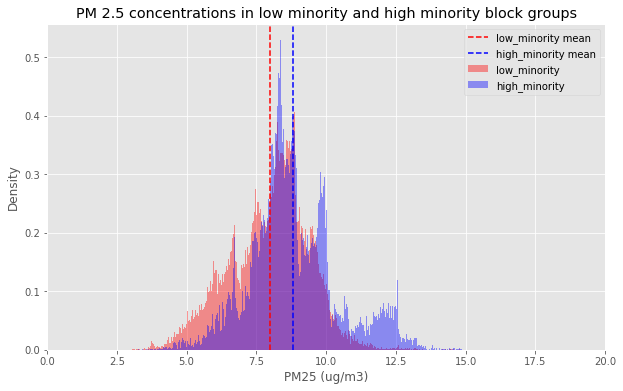

In [68]:

#Compare the distribution of RESP hazard index in low and high minority groups.
#normalized histograms
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(low_minority_groups['PM25 (ug/m3)'], alpha=0.4, color='red', label='low_minority', density=True, bins=500)
ax.hist(high_minority_groups['PM25 (ug/m3)'], alpha=0.4, color='blue', label='high_minority', density=True, bins=500)
ax.axvline(mean_pm25_low_minority, label='low_minority mean', color='red', ls='--')
ax.axvline(mean_pm25_high_minority, label='high_minority mean', color='blue', ls='--')
ax.set_xlabel('PM25 (ug/m3)')
ax.set_ylabel('Density')
ax.legend()
plt.xlim(0, 20)
ax.set_title('PM 2.5 concentrations in low minority and high minority block groups')
;

plt.savefig('images/pm25_hist2.jpg')


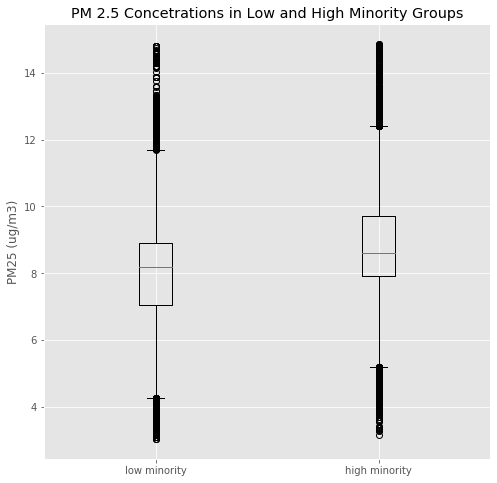

In [69]:
# Compare the distribution of RESP hazard index in low and high minority groups.
#box plot
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.boxplot([low_minority_groups['PM25 (ug/m3)'], high_minority_groups['PM25 (ug/m3)']])
ax.set_xticks([1,2])
ax.set_ylabel('PM25 (ug/m3)')
ax.set_title('PM 2.5 Concetrations in Low and High Minority Groups')
ax.set_xticklabels(['low minority', 'high minority']);
plt.savefig('images/pm25_boxplot1.jpg')


## Hypothesis Test #4: Ozone concentration in low minority/high minority groups

- H_0: the average Ozone concentration in low minority groups is equal to the average Ozone concentration in high minority groups

- H_a: the average Ozone concentration in high minority groups is greater than the average Ozone concentration in low minority groups

In [70]:
#U Test: Ozone

res = stats.mannwhitneyu(low_minority_groups['OZONE (ppb)'], 
      high_minority_groups['OZONE (ppb)'], alternative='two-sided')
print(res)
print("p-value: {:2.3f}".format(res.pvalue))


MannwhitneyuResult(statistic=4453198793.0, pvalue=3.4074335765250025e-289)
p-value: 0.000


In [71]:
#H_0: low_min Ozone levels = high_min Ozone levels
test_statistic, p_value = stats.ttest_ind(low_minority_groups['OZONE (ppb)'], 
                          high_minority_groups['OZONE (ppb)'], equal_var=False)

#effect size
mean_ozone_low_minority= low_minority_groups['OZONE (ppb)'].mean()
mean_ozone_high_minority= high_minority_groups['OZONE (ppb)'].mean()
ozone_effect_size= abs(mean_ozone_high_minority - mean_ozone_low_minority)

print(f'test_statistic: {test_statistic}, p_value: {p_value}')
print(f'mean OZONE low minority groups: {mean_ozone_low_minority}')
print(f'mean OZONE high minority groups: {mean_ozone_high_minority}')
print(f'effect size: {ozone_effect_size}')
print(f'effect size is {round((ozone_effect_size/mean_ozone_low_minority) * 100, 3)} % of the mean')

#standard error of each sample
standard_error_low_minority_ozone = np.std(np.array(low_minority_groups['OZONE (ppb)']))/(len(low_minority_groups['OZONE (ppb)'])**0.5)
standard_error_high_minority_ozone = np.std(np.array(high_minority_groups['OZONE (ppb)']))/(len(high_minority_groups['OZONE (ppb)'])**0.5)
print(f'standard error of low minority OZONE (ppb): {standard_error_low_minority_ozone}')
print(f'standard error of high minority OZONE (ppb): {standard_error_high_minority_ozone}')


test_statistic: -30.196865119264093, p_value: 2.142534520129428e-199
mean OZONE low minority groups: 42.62825818872641
mean OZONE high minority groups: 43.63484928672199
effect size: 1.0065910979955746
effect size is 2.361 % of the mean
standard error of low minority OZONE (ppb): 0.014465263670189833
standard error of high minority OZONE (ppb): 0.030031918181910353


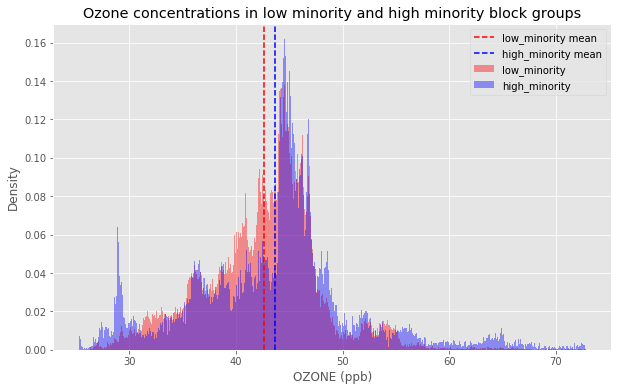

In [72]:

#Compare the distribution of RESP hazard index in low and high minority groups.
#normalized histograms
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(low_minority_groups['OZONE (ppb)'], alpha=0.4, color='red', label='low_minority', density=True, bins=500)
ax.hist(high_minority_groups['OZONE (ppb)'], alpha=0.4, color='blue', label='high_minority', density=True, bins=500)
ax.axvline(mean_ozone_low_minority, label='low_minority mean', color='red', ls='--')
ax.axvline(mean_ozone_high_minority, label='high_minority mean', color='blue', ls='--')
ax.set_xlabel('OZONE (ppb)')
ax.set_ylabel('Density')
ax.legend()
# plt.xlim(0, 20)
ax.set_title('Ozone concentrations in low minority and high minority block groups')
;

plt.savefig('images/ozone_hist2.jpg')


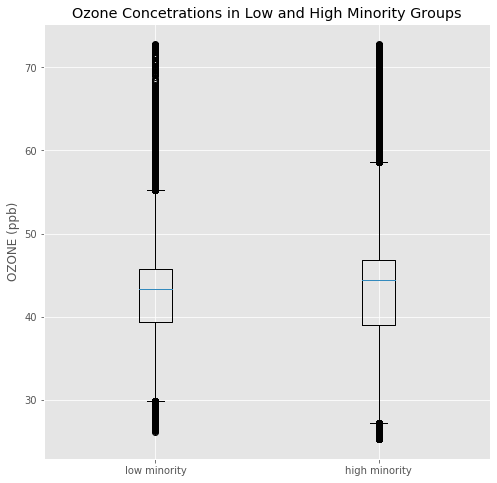

In [73]:
# Compare the distribution of RESP hazard index in low and high minority groups.
#box plot
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.boxplot([low_minority_groups['OZONE (ppb)'], high_minority_groups['OZONE (ppb)']])
ax.set_xticks([1,2])
ax.set_ylabel('OZONE (ppb)')
ax.set_title('Ozone Concetrations in Low and High Minority Groups')
ax.set_xticklabels(['low minority', 'high minority']);
plt.savefig('images/ozone_boxplot1.jpg')


## Hypothesis Testing: alameda county
RESP hazard index

In [74]:
#median percent minority in alameda county

median_pct_minority_alameda = np.median(np.array(df_alameda['Percent Minority']))
median_pct_minority_alameda

0.709174311927

In [75]:
#minority percent groups in alameda county

low_minority_groups_alameda= df_alameda[df_alameda['Percent Minority'] < 0.5]
high_minority_groups_alameda = df_alameda[df_alameda['Percent Minority'] >= 0.5]


In [76]:
mean_resp_low_minority_alameda= low_minority_groups_alameda['RESP (hazard index)'].mean()
mean_resp_high_minority_alameda= high_minority_groups_alameda['RESP (hazard index)'].mean()
resp_effect_size_alameda= abs(mean_resp_high_minority_alameda - mean_resp_low_minority_alameda)
print(f'mean RESP low minority groups alameda: {mean_resp_low_minority_alameda}')
print(f'mean RESP high minority groups alameda: {mean_resp_high_minority_alameda}')
print(f'effect size: {resp_effect_size_alameda}')

print(f'effect size is {round((resp_effect_size_alameda/mean_resp_low_minority_alameda) * 100, 3)} % of the mean')

mean RESP low minority groups alameda: 0.432211815178505
mean RESP high minority groups alameda: 0.43817016948359083
effect size: 0.0059583543050858445
effect size is 1.379 % of the mean


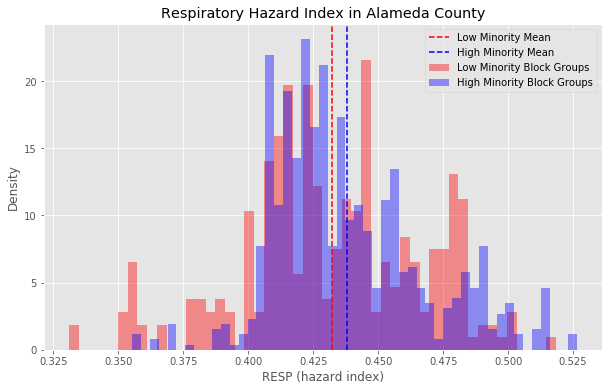

In [77]:
#plot normalized histograms for RESP hazard index for low_minority and high_minority groups.
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(low_minority_groups_alameda['RESP (hazard index)'], alpha=0.4, color='red', label='Low Minority Block Groups', density=True, bins=50)
ax.hist(high_minority_groups_alameda['RESP (hazard index)'], alpha=0.4, color='blue', label='High Minority Block Groups', density=True, bins=50)
ax.axvline(mean_resp_low_minority_alameda, label='Low Minority Mean', color='red', ls='--')
ax.axvline(mean_resp_high_minority_alameda, label='High Minority Mean', color='blue', ls='--')
ax.set_xlabel('RESP (hazard index)')
ax.set_ylabel('Density')
ax.legend()
# plt.xlim(0, 1.5)
ax.set_title('Respiratory Hazard Index in Alameda County');
plt.savefig('images/resp_alameda_hist.jpg')

In [78]:
#U Test: RESP hazard index
#H_0: low minority groups are equally likely to have higher RESP 
#index as high minority groups and vice versa

res = stats.mannwhitneyu(low_minority_groups_alameda['RESP (hazard index)'], 
      high_minority_groups_alameda['RESP (hazard index)'], alternative='two-sided')
print(res)
print("p-value for low minority RESP < high minority RESP: {:2.3f}".format(res.pvalue))


MannwhitneyuResult(statistic=100272.0, pvalue=0.07410908070022978)
p-value for low minority RESP < high minority RESP: 0.074


In [79]:
#RESP Hazard Index
test_statistic, p_value = stats.ttest_ind(low_minority_groups_alameda['RESP (hazard index)'], 
                          high_minority_groups_alameda['RESP (hazard index)'], equal_var=False)

print(f'test_statistic: {test_statistic}, p_value: {p_value}')

print(f'mean RESP low minority groups: {mean_resp_low_minority_alameda}')
print(f'mean RESP high minority groups: {mean_resp_high_minority_alameda}')
print(f'effect size: {resp_effect_size_alameda}')

print(f'effect size is {round((resp_effect_size_alameda/mean_resp_low_minority_alameda) * 100, 3)} % of the mean')


#standard error of each sample
standard_error_low_minority_resp_alameda = np.std(np.array(low_minority_groups_alameda['RESP (hazard index)']))/(len(low_minority_groups_alameda['RESP (hazard index)'])**0.5)
standard_error_high_minority_resp_alameda = np.std(np.array(high_minority_groups_alameda['RESP (hazard index)']))/(len(high_minority_groups_alameda['RESP (hazard index)'])**0.5)
print(f'standard error of low minority RESP hazard index in alameda: {standard_error_low_minority_resp_alameda}')
print(f'standard error of high minority RESP hazard index in alameda: {standard_error_high_minority_resp_alameda}')


test_statistic: -2.575686913829788, p_value: 0.010325308120893701
mean RESP low minority groups: 0.432211815178505
mean RESP high minority groups: 0.43817016948359083
effect size: 0.0059583543050858445
effect size is 1.379 % of the mean
standard error of low minority RESP hazard index in alameda: 0.0020494173701168183
standard error of high minority RESP hazard index in alameda: 0.0010653585302232659


## Hypothesis Testing: California
RESP hazard index

In [80]:
#median percent minority in CA

median_pct_minority_ca = np.median(np.array(df_ca['Percent Minority']))
median_pct_minority_ca

0.6011000599295

In [81]:

#minority percent groups in ca
low_minority_groups_ca= df_ca[df_ca['Percent Minority'] < 0.5]
high_minority_groups_ca = df_ca[df_ca['Percent Minority'] >= 0.5]

In [82]:
mean_resp_low_minority_ca= low_minority_groups_ca['RESP (hazard index)'].mean()
mean_resp_high_minority_ca= high_minority_groups_ca['RESP (hazard index)'].mean()
resp_effect_size_ca= abs(mean_resp_high_minority_ca - mean_resp_low_minority_ca)
print(f'mean RESP low minority groups ca: {mean_resp_low_minority_ca}')
print(f'mean RESP high minority groups ca: {mean_resp_high_minority_ca}')
print(f'effect size: {resp_effect_size_ca}')

print(f'effect size is {round((resp_effect_size_ca/mean_resp_low_minority_ca) * 100, 3)} % of the mean')

mean RESP low minority groups ca: 0.5169664196662289
mean RESP high minority groups ca: 0.5691297194174773
effect size: 0.05216329975124834
effect size is 10.09 % of the mean


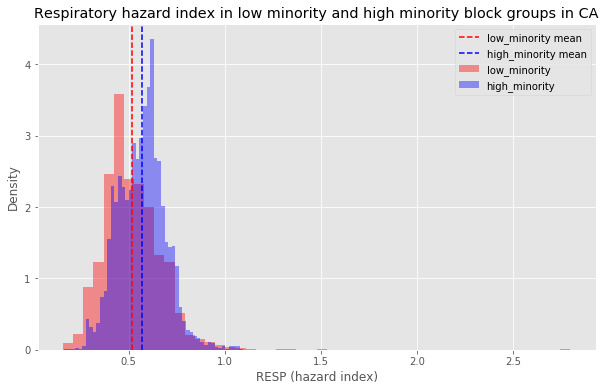

In [83]:
#plot normalized histograms for RESP hazard index for low_minority and high_minority groups.
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(low_minority_groups_ca['RESP (hazard index)'], alpha=0.4, color='red', label='low_minority', density=True, bins=50)
ax.hist(high_minority_groups_ca['RESP (hazard index)'], alpha=0.4, color='blue', label='high_minority', density=True, bins=50)
ax.axvline(mean_resp_low_minority_ca, label='low_minority mean', color='red', ls='--')
ax.axvline(mean_resp_high_minority_ca, label='high_minority mean', color='blue', ls='--')
ax.set_xlabel('RESP (hazard index)')
ax.set_ylabel('Density')
ax.legend()
# plt.xlim(0, 1.5)
ax.set_title('Respiratory hazard index in low minority and high minority block groups in CA');


In [84]:
#RESP Hazard Index
test_statistic, p_value = stats.ttest_ind(low_minority_groups_ca['RESP (hazard index)'], 
                          high_minority_groups_ca['RESP (hazard index)'], equal_var=False)

print(f'test_statistic: {test_statistic}, p_value: {p_value}')

print(f'mean RESP low minority groups: {mean_resp_low_minority_ca}')
print(f'mean RESP high minority groups: {mean_resp_high_minority_ca}')
print(f'effect size: {resp_effect_size_ca}')

print(f'effect size is {round((resp_effect_size_ca/mean_resp_low_minority_ca) * 100, 3)} % of the mean')


test_statistic: -27.667370973566054, p_value: 7.030212157589457e-165
mean RESP low minority groups: 0.5169664196662289
mean RESP high minority groups: 0.5691297194174773
effect size: 0.05216329975124834
effect size is 10.09 % of the mean


## Heat Map

In [67]:
df_geo = pd.read_csv('data/cbg_geographic_data.csv')

In [68]:
df_geo.head()

census_block_group  amount_land  amount_water   latitude  longitude
0         10010201001    4254524.0         23431  32.465829 -86.489614
1         10010201002    5568295.0             0  32.485849 -86.489690
2         10010202001    2058380.0             0  32.480082 -86.474974
3         10010202002    1283506.0          5968  32.464435 -86.469766
4         10010203001    3866515.0          9054  32.480175 -86.460793

In [69]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220333 entries, 0 to 220332
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   census_block_group  220333 non-null  int64  
 1   amount_land         220333 non-null  float64
 2   amount_water        220333 non-null  int64  
 3   latitude            220333 non-null  float64
 4   longitude           220333 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 8.4 MB


In [70]:
df_geo['census_block_group'] = df_geo['census_block_group'].astype(str)


In [71]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220333 entries, 0 to 220332
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   census_block_group  220333 non-null  object 
 1   amount_land         220333 non-null  float64
 2   amount_water        220333 non-null  int64  
 3   latitude            220333 non-null  float64
 4   longitude           220333 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.4+ MB


In [72]:
df_ca2 = df_ca.merge(df_geo, how='left', left_on='ID', right_on='census_block_group')
df_ca2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23136 entries, 0 to 23135
Data columns (total 25 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ID                                                       23136 non-null  object 
 1   state                                                    23136 non-null  object 
 2   county                                                   23136 non-null  object 
 3   census tract                                             23136 non-null  object 
 4   STATE_NAME                                               23136 non-null  object 
 5   Total Population                                         23136 non-null  int64  
 6   Percent Minority                                         23136 non-null  float64
 7   Percent Low Income                                       23136 non-null  float64
 8   PM25 (ug/m3)              

In [73]:
df_ca2 = df_ca2.rename(columns={'Percent Minority': 'percent_minority'})

df_ca2

ID state county census tract  STATE_NAME  Total Population  \
0      60014001001     6   6001   6001400100  California              2991   
1      60014002001     6   6001   6001400200  California              1102   
2      60014002002     6   6001   6001400200  California               895   
3      60014003001     6   6001   6001400300  California              1336   
4      60014003002     6   6001   6001400300  California              1369   
...            ...   ...    ...          ...         ...               ...   
23131  61150410005     6   6115   6115041000  California               449   
23132  61150411001     6   6115   6115041100  California               915   
23133  61150411002     6   6115   6115041100  California              1263   
23134  61150411003     6   6115   6115041100  California              1285   
23135  61150411004     6   6115   6115041100  California               902   

       percent_minority  Percent Low Income  PM25 (ug/m3)  OZONE (ppb)  \
0              0.307924            0.095909      8.272783    29.312510   
1              0.294918            0.078947      8.309303    28.514542   
2              0.277095            0.163861      8.309303    28.514542   
3              0.324850            0.037425      8.322281    28.288393   
4              0.311907            0.158408      8.322281    28.288393   
...                 ...                 ...           ...          ...   
23131          0.182628            0.423163      7.576128    53.702627   
23132          0.139891            0.309290      6.753812    54.715416   
23133          0.258907            0.348377      6.753812    54.715416   
23134          0.101167            0.544747      6.753812    54.715416   
23135          0.160754            0.388027      6.753812    54.715416   

       DSLPM (ug/m3)  CANCER (lifetime risk per million)  RESP (hazard index)  \
0           0.597205                           26.496604             0.437041   
1           0.784154                           28.281955             0.477660   
2           0.784154                           28.281955             0.477660   
3           0.816160                           28.593743             0.478842   
4           0.816160                           28.593743             0.478842   
...              ...                                 ...                  ...   
23131       0.132695                           39.271338             0.613365   
23132       0.054602                           38.808965             0.605763   
23133       0.054602                           38.808965             0.605763   
23134       0.054602                           38.808965             0.605763   
23135       0.054602                           38.808965             0.605763   

       LDPNT (fraction pre-1960)  PNPL (facilities/km distance)  \
0                       0.176558                       0.118582   
1                       0.957014                       0.152012   
2                       0.871921                       0.161547   
3                       0.953291                       0.165869   
4                       0.748336                       0.191764   
...                          ...                            ...   
23131                   0.113402                       0.042622   
23132                   0.226300                       0.037255   
23133                   0.053549                       0.037481   
23134                   0.264993                       0.036671   
23135                   0.448052                       0.044171   

       PRMP (facilities/km distance)  PTSDF (facilities/km distance)  \
0                           0.175204                        2.292090   
1                           0.236346                        5.426261   
2                           0.239507                        5.930150   
3                           0.225605                        5.962845   
4                           0.357574                

In [74]:
# coordinates for central CA: 36.7783° N, 119.4179° W
#california.geojson taken from ropensci geojsonio repo in github.
import folium
from folium import plugins
from folium.plugins import HeatMap
import os
import time
import subprocess
from selenium import webdriver
from branca.element import Template, MacroElement

In [75]:
ca_geo = 'data/california.geojson'

m = folium.Map(location=[37.3, -109.4179], zoom_start=5.25, tiles = 'StamenToner')

m



max_minority = (df_ca2['percent_minority']).max()


hm_wide = HeatMap(list(zip(df_ca2.latitude.values, df_ca2.longitude.values, df_ca2.percent_minority.values)),
        min_opacity=0.4,
        max_val=max_minority,
        radius=7,
        blur=15,
        max_zoom=1).add_to(m)

m.add_child(hm_wide)
m

In [76]:
ca_geo = 'data/california.geojson'

m2 = folium.Map(location=[37.3, -109.4179], zoom_start=5.25, tiles = 'StamenToner')

m2



max_pm25 = (df_ca2['PM25 (ug/m3)']).max()


hm_wide = HeatMap(list(zip(df_ca2.latitude.values, df_ca2.longitude.values, 
                           df_ca2['PM25 (ug/m3)'])),
        min_opacity=0.4,
        max_val=max_pm25,
        radius=7,
        blur=15,
        max_zoom=1).add_to(m2)

m2.add_child(hm_wide)
m2

In [79]:
#save heatmaps
delay=5
fn='images/percent_minority_heatmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)

fn2='images/pm25_heatmap.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn2)
m2.save(fn2)

In [80]:
# browser = webdriver.Firefox()
# browser.get(tmpurl)
# #Give the map tiles some time to load
# time.sleep(delay)
# browser.save_screenshot('map.png')
# browser.quit()